In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [2]:
df= pd.read_csv('train.csv')
df.head()

,Artist Name,Track Name,Popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_in min/ms,time_signature,Class
0,Bruno Mars,That's What I Like (feat. Gucci Mane),60.0,0.854,0.564,1.0,-4.964,1,0.0485,0.017100,NaN,0.0849,0.8990,134.071,234596.0,4,5
1,Boston,Hitch a Ride,54.0,0.382,0.814,3.0,-7.230,1,0.0406,0.001100,0.004010,0.1010,0.5690,116.454,251733.0,4,10
2,The Raincoats,No Side to Fall In,35.0,0.434,0.614,6.0,-8.334,1,0.0525,0.486000,0.000196,0.3940,0.7870,147.681,109667.0,4,6
3,Deno,Lingo (feat. J.I & Chunkz),66.0,0.853,0.597,10.0,-6.528,0,0.0555,0.021200,NaN,0.1220,0.5690,107.033,173968.0,4,5
4,Red Hot Chili Peppers,Nobody Weird Like Me - Remastered,53.0,0.167,0.975,2.0,-4.279,1,0.2160,0.000169,0.016100,0.1720,0.0918,199.060,229960.0,4,10


In [3]:
df.shape

(17996, 17)

In [4]:
df.describe()

,Popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_in min/ms,time_signature,Class
count,17568.000000,17996.000000,17996.000000,15982.000000,17996.000000,17996.000000,17996.000000,17996.000000,13619.000000,17996.000000,17996.000000,17996.000000,1.799600e+04,17996.000000,17996.000000
mean,44.512124,0.543433,0.662777,5.952447,-7.910660,0.636753,0.079707,0.247082,0.177562,0.196170,0.486208,122.623294,2.007445e+05,3.924039,6.695821
std,17.426928,0.166268,0.235373,3.196854,4.049151,0.480949,0.083576,0.310632,0.304048,0.159212,0.240195,29.571527,1.119891e+05,0.361618,3.206073
min,1.000000,0.059600,0.000020,1.000000,-39.952000,0.000000,0.022500,0.000000,0.000001,0.011900,0.018300,30.557000,5.016500e-01,1.000000,0.000000
25%,33.000000,0.432000,0.509000,3.000000,-9.538000,0.000000,0.034800,0.004300,0.000089,0.097500,0.297000,99.620750,1.663370e+05,4.000000,5.000000
50%,44.000000,0.545000,0.700000,6.000000,-7.016000,1.000000,0.047400,0.081400,0.003910,0.129000,0.481000,120.065500,2.091600e+05,4.000000,8.000000
75%,56.000000,0.659000,0.860000,9.000000,-5.189000,1.000000,0.083000,0.434000,0.200000,0.258000,0.672000,141.969250,2.524900e+05,4.000000,10.000000
max,100.000000,0.989000,1.000000,11.000000,1.355000,1.000000,0.955000,0.996000,0.996000,1.000000,0.986000,217.416000,1.477187e+06,5.000000,10.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17996 entries, 0 to 17995
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Artist Name         17996 non-null  object 
 1   Track Name          17996 non-null  object 
 2   Popularity          17568 non-null  float64
 3   danceability        17996 non-null  float64
 4   energy              17996 non-null  float64
 5   key                 15982 non-null  float64
 6   loudness            17996 non-null  float64
 7   mode                17996 non-null  int64  
 8   speechiness         17996 non-null  float64
 9   acousticness        17996 non-null  float64
 10  instrumentalness    13619 non-null  float64
 11  liveness            17996 non-null  float64
 12  valence             17996 non-null  float64
 13  tempo               17996 non-null  float64
 14  duration_in min/ms  17996 non-null  float64
 15  time_signature      17996 non-null  int64  
 16  Clas

In [6]:
df['Artist Name'].unique

<bound method Series.unique of 0                   Bruno Mars
1                       Boston
2                The Raincoats
3                         Deno
4        Red Hot Chili Peppers
                 ...          
17991              Green-House
17992                 Micatone
17993          Smash Hit Combo
17994                  Beherit
17995           The Raconteurs
Name: Artist Name, Length: 17996, dtype: object>

In [7]:
len(df['Artist Name'].unique())

9149

In [8]:
df['Track Name'].unique

<bound method Series.unique of 0        That's What I Like (feat. Gucci Mane)
1                                 Hitch a Ride
2                           No Side to Fall In
3                   Lingo (feat. J.I & Chunkz)
4            Nobody Weird Like Me - Remastered
                         ...                  
17991                                Find Home
17992                                 All Gone
17993                             Peine perdue
17994                           Salomon's Gate
17995                       Broken Boy Soldier
Name: Track Name, Length: 17996, dtype: object>

In [9]:
len(df['Track Name'].unique())

15129

In [10]:
for i in range (17):
    print('number of null values in',i,':')
    nullcheck=df.iloc[:,i].isnull().sum()
    print(nullcheck)

number of null values in 0 :
0
number of null values in 1 :
0
number of null values in 2 :
428
number of null values in 3 :
0
number of null values in 4 :
0
number of null values in 5 :
2014
number of null values in 6 :
0
number of null values in 7 :
0
number of null values in 8 :
0
number of null values in 9 :
0
number of null values in 10 :
4377
number of null values in 11 :
0
number of null values in 12 :
0
number of null values in 13 :
0
number of null values in 14 :
0
number of null values in 15 :
0
number of null values in 16 :
0


In [11]:
df.isnull().sum()

Artist Name              0
Track Name               0
Popularity             428
danceability             0
energy                   0
key                   2014
loudness                 0
mode                     0
speechiness              0
acousticness             0
instrumentalness      4377
liveness                 0
valence                  0
tempo                    0
duration_in min/ms       0
time_signature           0
Class                    0
dtype: int64

In [12]:
nullpercentage = pd.DataFrame(df.isnull().sum(),columns=['Number of null values'])
nullpercentage['Fraction of values ']=np.round((df.isnull().sum()/df.shape[0]),2)
nullpercentage

,Number of null values,Fraction of values
Artist Name,0,0.00
Track Name,0,0.00
Popularity,428,0.02
danceability,0,0.00
energy,0,0.00
key,2014,0.11
loudness,0,0.00
mode,0,0.00
speechiness,0,0.00
acousticness,0,0.00


In [13]:
nullpercentage = pd.DataFrame(df.isnull().sum(),columns=['Number of null values'])
nullpercentage['Fraction of values ']=np.round((df.isnull().sum()/df.shape[0]),2)*100
nullpercentage

,Number of null values,Fraction of values
Artist Name,0,0.0
Track Name,0,0.0
Popularity,428,2.0
danceability,0,0.0
energy,0,0.0
key,2014,11.0
loudness,0,0.0
mode,0,0.0
speechiness,0,0.0
acousticness,0,0.0


In [14]:
nullpercentage=nullpercentage.sort_values(['Number of null values'],ascending=False)
nullpercentage

,Number of null values,Fraction of values
instrumentalness,4377,24.0
key,2014,11.0
Popularity,428,2.0
Artist Name,0,0.0
time_signature,0,0.0
duration_in min/ms,0,0.0
tempo,0,0.0
valence,0,0.0
liveness,0,0.0
speechiness,0,0.0


In [15]:
nullpercentage.head(3)

,Number of null values,Fraction of values
instrumentalness,4377,24.0
key,2014,11.0
Popularity,428,2.0


In [16]:
df[df['Popularity'].isnull()]

,Artist Name,Track Name,Popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_in min/ms,time_signature,Class
25,"IndianRaga, Akshay Anantapadmanabhan, Madhu Iy...",Swagatham Krishna - Mohanam - Adi,NaN,0.548,0.711,10.0,-8.440,1,0.1070,0.542000,0.000096,0.3550,0.618,119.675,4.015633,3,0
43,Lilly Wood and The Prick,A Song,NaN,0.618,0.438,11.0,-7.495,1,0.0762,0.407000,NaN,0.5000,0.651,155.014,209307.000000,4,6
51,How Lucky,"Kurt Vile, John Prine",NaN,0.523,0.441,5.0,-9.928,1,0.0311,0.465000,0.002680,0.3650,0.490,171.246,3.385117,4,0
95,The Beatles,She's Leaving Home - Remastered,NaN,0.381,0.214,4.0,-11.629,1,0.0337,0.944000,NaN,0.1060,0.393,127.581,3.586000,3,0
111,Faith No More,Falling to Pieces,NaN,0.545,0.919,2.0,-7.679,1,0.0483,0.002690,0.005120,0.0978,0.386,104.364,313573.000000,4,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17741,Westlife,That's Where You Find Love,NaN,0.464,0.493,2.0,-5.626,1,0.0302,0.273000,NaN,0.2210,0.244,120.990,3.741783,4,9
17855,Avarus,Sadist,NaN,0.502,0.991,6.0,-4.612,1,0.1350,0.000173,0.000017,0.3320,0.285,99.953,191100.000000,4,10
17873,Erika de Casier,Someone to Chill With,NaN,0.610,0.757,2.0,-6.271,0,0.0377,0.075400,0.010600,0.1470,0.468,162.050,199705.000000,4,6
17912,Hype Lights,Something Wrong,NaN,0.385,0.983,4.0,-4.052,0,0.1060,0.000098,0.000010,0.2910,0.354,156.987,162803.000000,4,10


In [17]:
nullpopular = df[df['Popularity'].isnull()]
nullpopular.index

Int64Index([   25,    43,    51,    95,   111,   116,   268,   284,   318,
              335,
            ...
            17626, 17635, 17689, 17712, 17726, 17741, 17855, 17873, 17912,
            17931],
           dtype='int64', length=428)

In [18]:
df = df.drop(nullpopular.index)
df

,Artist Name,Track Name,Popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_in min/ms,time_signature,Class
0,Bruno Mars,That's What I Like (feat. Gucci Mane),60.0,0.854,0.564,1.0,-4.964,1,0.0485,0.017100,NaN,0.0849,0.8990,134.071,234596.0,4,5
1,Boston,Hitch a Ride,54.0,0.382,0.814,3.0,-7.230,1,0.0406,0.001100,0.004010,0.1010,0.5690,116.454,251733.0,4,10
2,The Raincoats,No Side to Fall In,35.0,0.434,0.614,6.0,-8.334,1,0.0525,0.486000,0.000196,0.3940,0.7870,147.681,109667.0,4,6
3,Deno,Lingo (feat. J.I & Chunkz),66.0,0.853,0.597,10.0,-6.528,0,0.0555,0.021200,NaN,0.1220,0.5690,107.033,173968.0,4,5
4,Red Hot Chili Peppers,Nobody Weird Like Me - Remastered,53.0,0.167,0.975,2.0,-4.279,1,0.2160,0.000169,0.016100,0.1720,0.0918,199.060,229960.0,4,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17991,Green-House,Find Home,35.0,0.166,0.109,7.0,-17.100,0,0.0413,0.993000,0.824000,0.0984,0.1770,171.587,193450.0,3,6
17992,Micatone,All Gone,27.0,0.638,0.223,11.0,-10.174,0,0.0329,0.858000,0.000016,0.0705,0.3350,73.016,257067.0,4,2
17993,Smash Hit Combo,Peine perdue,34.0,0.558,0.981,4.0,-4.683,0,0.0712,0.000030,0.000136,0.6660,0.2620,105.000,216222.0,4,8
17994,Beherit,Salomon's Gate,29.0,0.215,0.805,6.0,-12.757,0,0.1340,0.001290,0.916000,0.2560,0.3550,131.363,219693.0,4,8


In [19]:
df.shape

(17568, 17)

In [20]:
nullpercentage = pd.DataFrame(df.isnull().sum(),columns=['Number of null values'])
nullpercentage['Fraction of values ']=np.round((df.isnull().sum()/df.shape[0]),2)*100
nullpercentage

,Number of null values,Fraction of values
Artist Name,0,0.0
Track Name,0,0.0
Popularity,0,0.0
danceability,0,0.0
energy,0,0.0
key,1955,11.0
loudness,0,0.0
mode,0,0.0
speechiness,0,0.0
acousticness,0,0.0


In [21]:
nullpercentage=nullpercentage.sort_values(['Number of null values'],ascending=False)
nullpercentage

,Number of null values,Fraction of values
instrumentalness,4262,24.0
key,1955,11.0
Artist Name,0,0.0
acousticness,0,0.0
time_signature,0,0.0
duration_in min/ms,0,0.0
tempo,0,0.0
valence,0,0.0
liveness,0,0.0
speechiness,0,0.0


In [22]:
nullkey = df[df['key'].isnull()]
nullkey

,Artist Name,Track Name,Popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_in min/ms,time_signature,Class
33,Dreezy,Where Them $ @,42.0,0.858,0.5250,NaN,-7.332,1,0.1480,0.044300,0.007380,0.1970,0.351,170.875,193962.000000,4,5
34,The Ayoub Sisters,Mother's Pride,16.0,0.297,0.0958,NaN,-20.316,1,0.0384,0.844000,0.855000,0.1260,0.296,80.672,3.503783,4,7
36,Moon Guitar,Struna,47.0,0.320,0.2420,NaN,-15.170,1,0.0422,0.941000,0.930000,0.1650,0.431,81.090,2.817633,4,7
41,Lior Narkis,◊ó◊ú◊ß◊™ ◊ê◊ú◊ï◊î◊ô◊ù - ◊î◊©◊ô◊® ◊©◊ú ◊ê◊ï◊§◊ô◊®,44.0,0.479,0.4440,NaN,-6.497,1,0.0316,0.857000,NaN,0.1410,0.236,107.915,174242.000000,4,9
47,The Clash,The Magnificent Seven - Remastered,56.0,0.799,0.7890,NaN,-8.208,1,0.0395,0.059500,NaN,0.0338,0.831,116.083,333520.000000,4,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17967,Dudu Tassa,◊î◊ß◊ô◊®,23.0,0.483,0.9440,NaN,-3.371,0,0.0427,0.400000,NaN,0.2610,0.829,164.014,227747.000000,4,10
17970,Dua Lipa,Physical,72.0,0.647,0.8440,NaN,-3.756,1,0.0457,0.013700,0.000658,0.1020,0.746,146.962,193829.000000,4,9
17982,Lucia & The Best Boys,Blueheart,29.0,0.348,0.7260,NaN,-4.730,1,0.0449,0.000363,0.000142,0.3830,0.661,182.587,169164.000000,4,6
17985,Hippie Hourrah,La guerre,2.0,0.610,0.7660,NaN,-8.266,1,0.0267,0.000559,0.174000,0.0887,0.932,118.013,271467.000000,4,6


In [23]:
nullkey.index

Int64Index([   33,    34,    36,    41,    47,    52,    59,    66,    69,
               75,
            ...
            17934, 17945, 17957, 17961, 17962, 17967, 17970, 17982, 17985,
            17987],
           dtype='int64', length=1955)

In [24]:
df=df.drop(nullkey.index)
df

,Artist Name,Track Name,Popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_in min/ms,time_signature,Class
0,Bruno Mars,That's What I Like (feat. Gucci Mane),60.0,0.854,0.564,1.0,-4.964,1,0.0485,0.017100,NaN,0.0849,0.8990,134.071,234596.0,4,5
1,Boston,Hitch a Ride,54.0,0.382,0.814,3.0,-7.230,1,0.0406,0.001100,0.004010,0.1010,0.5690,116.454,251733.0,4,10
2,The Raincoats,No Side to Fall In,35.0,0.434,0.614,6.0,-8.334,1,0.0525,0.486000,0.000196,0.3940,0.7870,147.681,109667.0,4,6
3,Deno,Lingo (feat. J.I & Chunkz),66.0,0.853,0.597,10.0,-6.528,0,0.0555,0.021200,NaN,0.1220,0.5690,107.033,173968.0,4,5
4,Red Hot Chili Peppers,Nobody Weird Like Me - Remastered,53.0,0.167,0.975,2.0,-4.279,1,0.2160,0.000169,0.016100,0.1720,0.0918,199.060,229960.0,4,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17991,Green-House,Find Home,35.0,0.166,0.109,7.0,-17.100,0,0.0413,0.993000,0.824000,0.0984,0.1770,171.587,193450.0,3,6
17992,Micatone,All Gone,27.0,0.638,0.223,11.0,-10.174,0,0.0329,0.858000,0.000016,0.0705,0.3350,73.016,257067.0,4,2
17993,Smash Hit Combo,Peine perdue,34.0,0.558,0.981,4.0,-4.683,0,0.0712,0.000030,0.000136,0.6660,0.2620,105.000,216222.0,4,8
17994,Beherit,Salomon's Gate,29.0,0.215,0.805,6.0,-12.757,0,0.1340,0.001290,0.916000,0.2560,0.3550,131.363,219693.0,4,8


In [25]:
nullpercentage = pd.DataFrame(df.isnull().sum(),columns=['Number of null values'])
nullpercentage['Fraction of values ']=np.round((df.isnull().sum()/df.shape[0]),2)*100
nullpercentage

,Number of null values,Fraction of values
Artist Name,0,0.0
Track Name,0,0.0
Popularity,0,0.0
danceability,0,0.0
energy,0,0.0
key,0,0.0
loudness,0,0.0
mode,0,0.0
speechiness,0,0.0
acousticness,0,0.0


In [26]:
nullpercentage=nullpercentage.sort_values(['Number of null values'],ascending=False)
nullpercentage

,Number of null values,Fraction of values
instrumentalness,3800,24.0
Artist Name,0,0.0
acousticness,0,0.0
time_signature,0,0.0
duration_in min/ms,0,0.0
tempo,0,0.0
valence,0,0.0
liveness,0,0.0
speechiness,0,0.0
Track Name,0,0.0


In [27]:
nullinstrument = df[df['instrumentalness'].isnull()]
nullinstrument.index

Int64Index([    0,     3,     9,    11,    12,    19,    24,    30,    31,
               37,
            ...
            17942, 17944, 17954, 17963, 17965, 17966, 17972, 17974, 17978,
            17986],
           dtype='int64', length=3800)

In [28]:
avg=np.mean(df['instrumentalness'])
avg

0.17899141338186741

In [29]:
df=df.fillna(value=avg)

In [30]:
nullpercentage = pd.DataFrame(df.isnull().sum(),columns=['Number of null values'])
nullpercentage['Fraction of values ']=np.round((df.isnull().sum()/df.shape[0]),2)*100
nullpercentage

,Number of null values,Fraction of values
Artist Name,0,0.0
Track Name,0,0.0
Popularity,0,0.0
danceability,0,0.0
energy,0,0.0
key,0,0.0
loudness,0,0.0
mode,0,0.0
speechiness,0,0.0
acousticness,0,0.0


In [31]:
artist  = df['Artist Name'].unique()
list(artist)

['Bruno Mars',
 'Boston',
 'The Raincoats',
 'Deno',
 'Red Hot Chili Peppers',
 'The Stooges',
 'Solomon Burke',
 'Randy Travis',
 'Professional Murder Music',
 'Dudu Aharon',
 'Mohammed Rafi',
 'Arctic Monkeys',
 'Eyal Golan',
 'Harald Lassen, Bram de Looze',
 'Buffalo Springfield',
 'Elmore James',
 'Velvet Two Stripes',
 'Eden Ben Zaken',
 'DaBaby',
 'Mura Masa',
 'Clairmont The Second',
 'Krankhead',
 'The Stone Roses',
 'R3HAB',
 'MC Hammer',
 'duendita',
 'Rainbow',
 'fijitrip',
 'Machine Gun Kelly',
 'ShittyCT',
 'Tetrarch',
 'Brandon Jack & The Artifacts',
 'Ivri Lider',
 'Vieux Farka Tour√©',
 'Kvelertak',
 'Better Than Ezra',
 'Silversun Pickups',
 'Orange Juice',
 'U2',
 'Omer Adam',
 'Victor Manu',
 'The Last Shadow Puppets',
 'Anne-Marie',
 'Veruca Salt',
 'Juice WRLD',
 'BENEE',
 'Berry Sakharof',
 'Ganser',
 'Dion',
 'Soen',
 'Vani Jairam',
 'Liam Gallagher',
 'The Pretty Things',
 'Tha Dogg Pound',
 'BLAB',
 'Trillary Banks',
 'El Goodo',
 'Why Bonnie',
 'Snoop Dogg',
 

In [32]:
collab=lambda x :1 if(len(x.split(','))>1) else 0
collab

<function __main__.<lambda>(x)>

In [33]:
df['collaboration']=df['Artist Name'].apply(collab)
df['collaboration']

0        0
1        0
2        0
3        0
4        0
        ..
17991    0
17992    0
17993    0
17994    0
17995    0
Name: collaboration, Length: 15613, dtype: int64

In [34]:
df

,Artist Name,Track Name,Popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_in min/ms,time_signature,Class,collaboration
0,Bruno Mars,That's What I Like (feat. Gucci Mane),60.0,0.854,0.564,1.0,-4.964,1,0.0485,0.017100,0.178991,0.0849,0.8990,134.071,234596.0,4,5,0
1,Boston,Hitch a Ride,54.0,0.382,0.814,3.0,-7.230,1,0.0406,0.001100,0.004010,0.1010,0.5690,116.454,251733.0,4,10,0
2,The Raincoats,No Side to Fall In,35.0,0.434,0.614,6.0,-8.334,1,0.0525,0.486000,0.000196,0.3940,0.7870,147.681,109667.0,4,6,0
3,Deno,Lingo (feat. J.I & Chunkz),66.0,0.853,0.597,10.0,-6.528,0,0.0555,0.021200,0.178991,0.1220,0.5690,107.033,173968.0,4,5,0
4,Red Hot Chili Peppers,Nobody Weird Like Me - Remastered,53.0,0.167,0.975,2.0,-4.279,1,0.2160,0.000169,0.016100,0.1720,0.0918,199.060,229960.0,4,10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17991,Green-House,Find Home,35.0,0.166,0.109,7.0,-17.100,0,0.0413,0.993000,0.824000,0.0984,0.1770,171.587,193450.0,3,6,0
17992,Micatone,All Gone,27.0,0.638,0.223,11.0,-10.174,0,0.0329,0.858000,0.000016,0.0705,0.3350,73.016,257067.0,4,2,0
17993,Smash Hit Combo,Peine perdue,34.0,0.558,0.981,4.0,-4.683,0,0.0712,0.000030,0.000136,0.6660,0.2620,105.000,216222.0,4,8,0
17994,Beherit,Salomon's Gate,29.0,0.215,0.805,6.0,-12.757,0,0.1340,0.001290,0.916000,0.2560,0.3550,131.363,219693.0,4,8,0


# Exploratory data anlysis

In [35]:
sns.set()

In [36]:
df.corr()

,Popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_in min/ms,time_signature,Class,collaboration
Popularity,1.000000,0.167841,0.049912,0.005901,0.128904,0.014927,0.034451,-0.128204,-0.141583,-0.074121,0.055601,-0.004236,-0.028111,0.067760,0.156755,-0.051961
danceability,0.167841,1.000000,-0.107789,0.007082,0.049396,-0.068680,0.203774,0.017916,-0.172828,-0.105875,0.444102,-0.187918,-0.128275,0.129610,-0.104809,-0.070131
energy,0.049912,-0.107789,1.000000,0.015435,0.762748,-0.036950,0.124470,-0.743266,-0.151946,0.191197,0.210236,0.204699,0.241118,0.138418,0.210718,-0.158281
key,0.005901,0.007082,0.015435,1.000000,0.002787,-0.111741,0.001881,-0.009717,-0.001664,0.015091,0.030430,0.012491,0.013494,0.007617,-0.008763,-0.006641
loudness,0.128904,0.049396,0.762748,0.002787,1.000000,-0.038943,0.095718,-0.605532,-0.307774,0.105653,0.170883,0.157005,0.163787,0.122890,0.175312,-0.194197
mode,0.014927,-0.068680,-0.036950,-0.111741,-0.038943,1.000000,-0.067925,0.026868,-0.012555,-0.006292,-0.009946,0.016785,-0.069994,-0.016428,-0.044157,0.009623
speechiness,0.034451,0.203774,0.124470,0.001881,0.095718,-0.067925,1.000000,-0.086722,-0.052040,0.071345,0.054440,0.043878,-0.002812,0.053313,-0.067720,-0.043128
acousticness,-0.128204,0.017916,-0.743266,-0.009717,-0.605532,0.026868,-0.086722,1.000000,0.147989,-0.107990,-0.114044,-0.161297,-0.320331,-0.131312,-0.233007,0.213029
instrumentalness,-0.141583,-0.172828,-0.151946,-0.001664,-0.307774,-0.012555,-0.052040,0.147989,1.000000,-0.034856,-0.197926,-0.021640,0.004829,-0.061119,-0.026554,0.064233
liveness,-0.074121,-0.105875,0.191197,0.015091,0.105653,-0.006292,0.071345,-0.107990,-0.034856,1.000000,0.015657,0.023245,0.055559,0.016813,0.038376,-0.004538


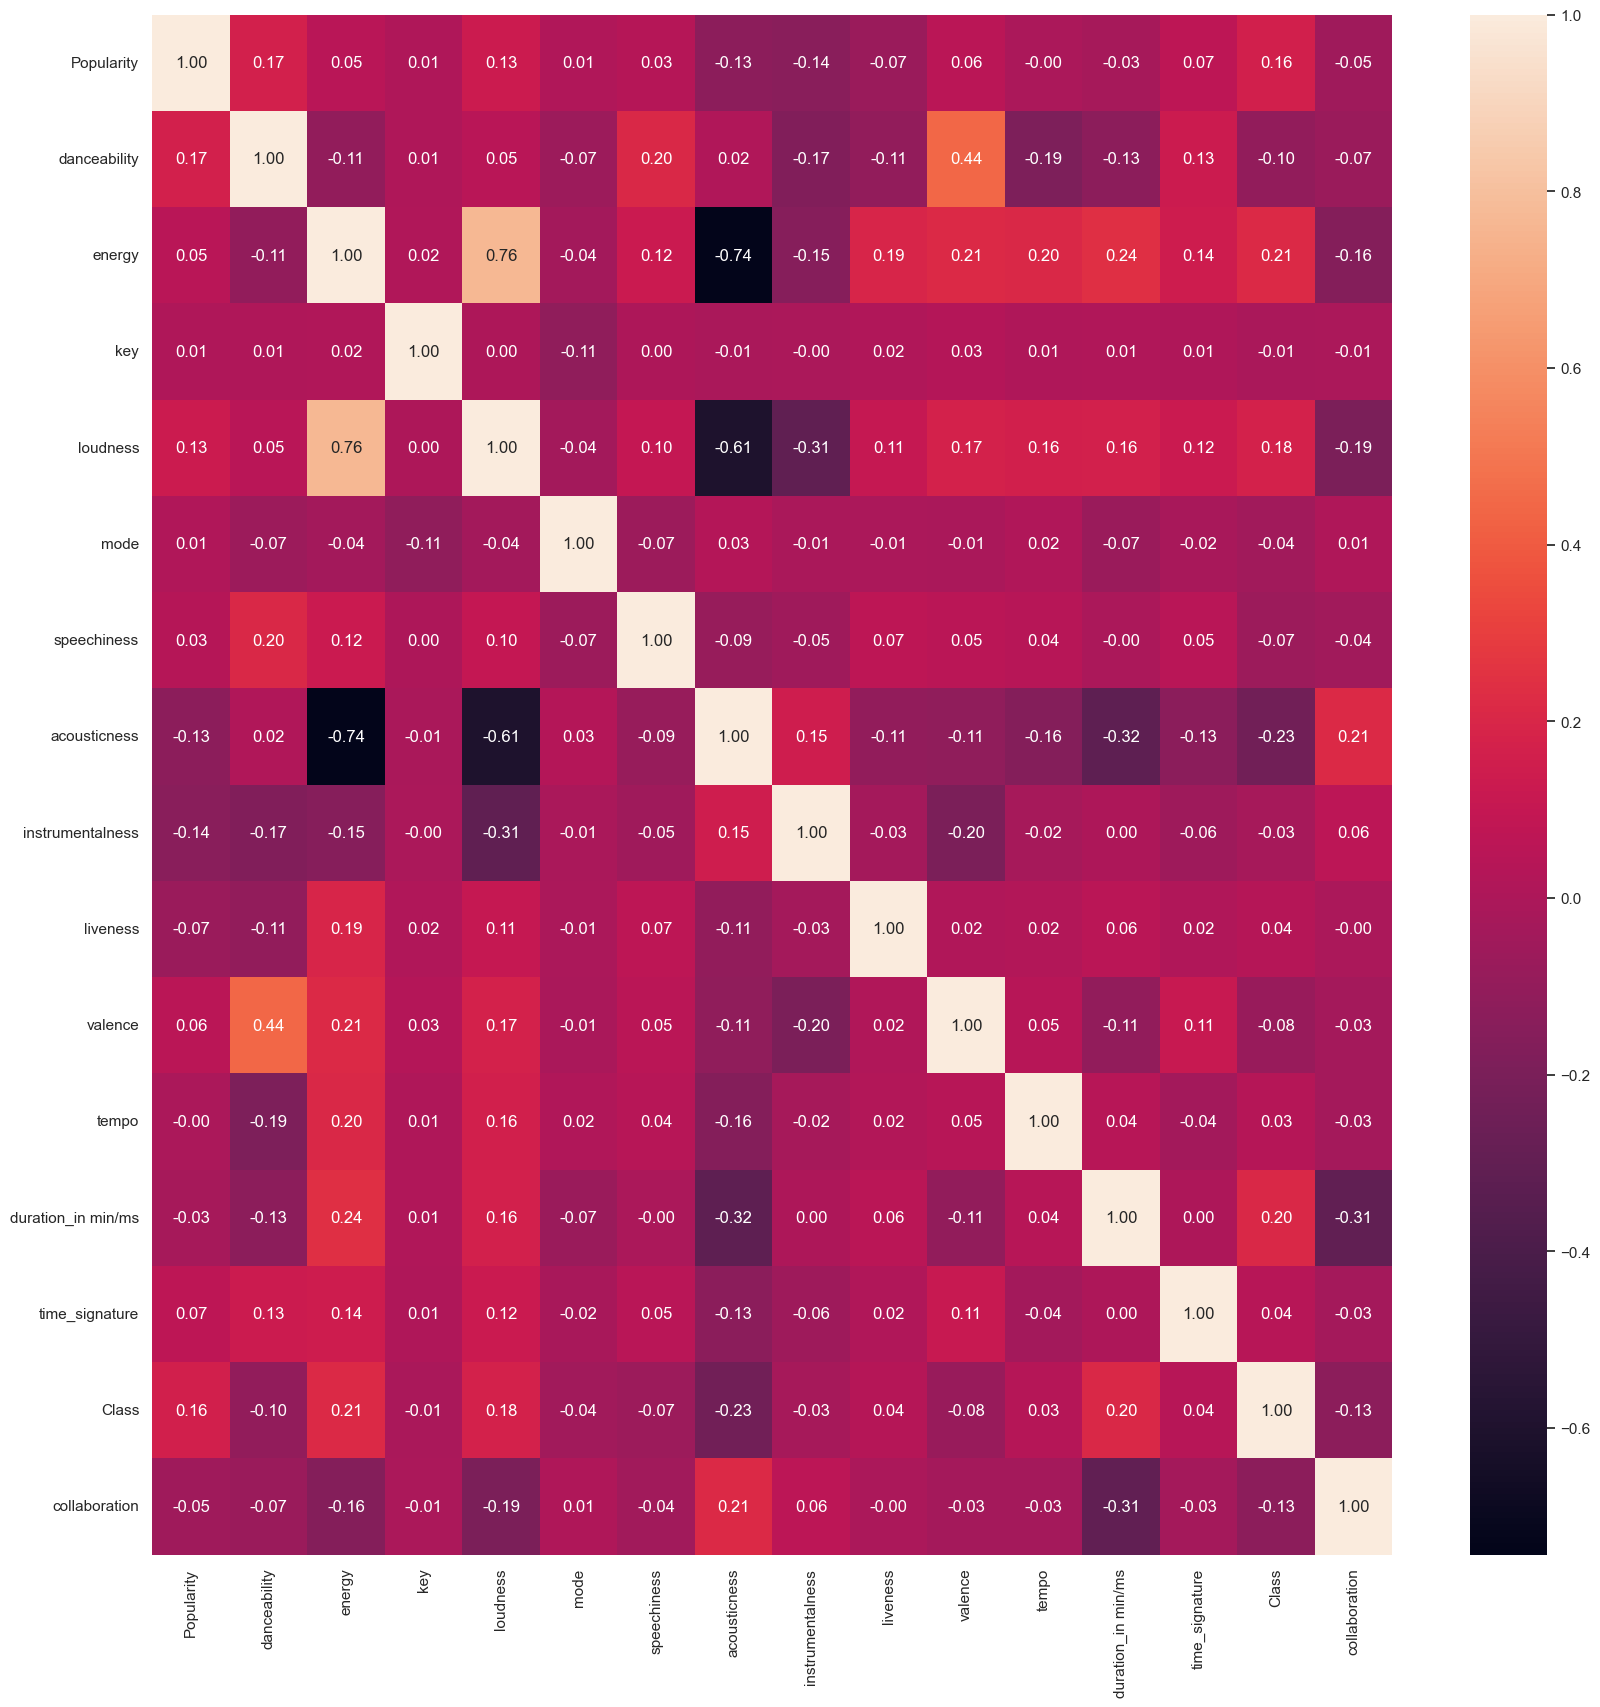

In [37]:
plt.figure(figsize=(20,20))
correlation = df.corr()
sns.heatmap(correlation,annot=True,fmt='0.2f')
plt.show()

<AxesSubplot:xlabel='Popularity', ylabel='Density'>

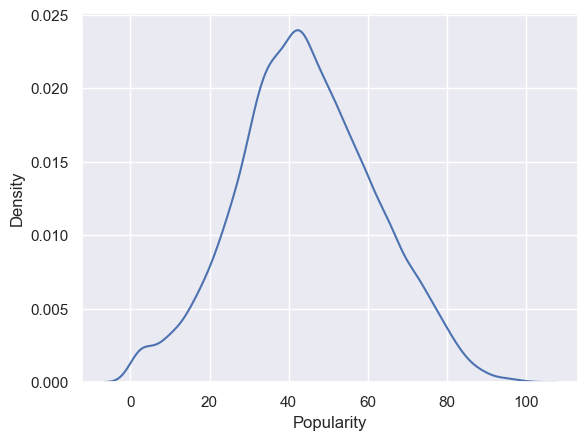

In [38]:
sns.kdeplot(df['Popularity'])

<AxesSubplot:xlabel='danceability', ylabel='Density'>

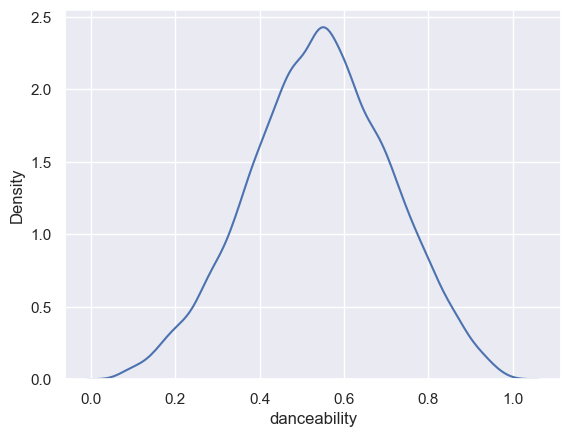

In [39]:
sns.kdeplot(df['danceability'])

In [40]:
df.columns

Index(['Artist Name', 'Track Name', 'Popularity', 'danceability', 'energy',
       'key', 'loudness', 'mode', 'speechiness', 'acousticness',
       'instrumentalness', 'liveness', 'valence', 'tempo',
       'duration_in min/ms', 'time_signature', 'Class', 'collaboration'],
      dtype='object')

<AxesSubplot:xlabel='energy', ylabel='Density'>

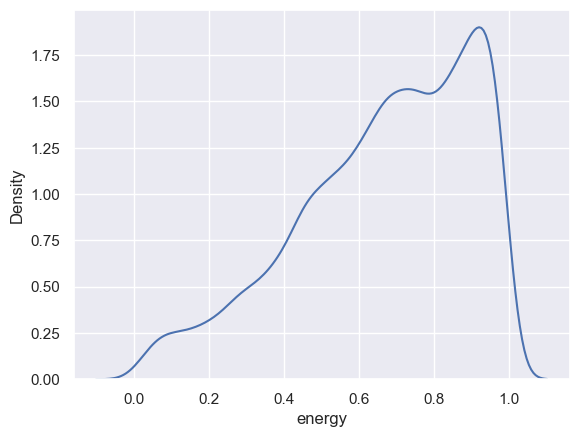

In [41]:
sns.kdeplot(df['energy'])

<AxesSubplot:xlabel='key', ylabel='Density'>

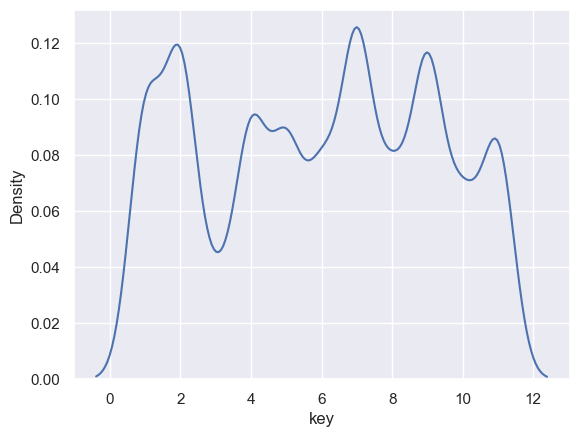

In [42]:
sns.kdeplot(df['key'])

<AxesSubplot:xlabel='loudness', ylabel='Density'>

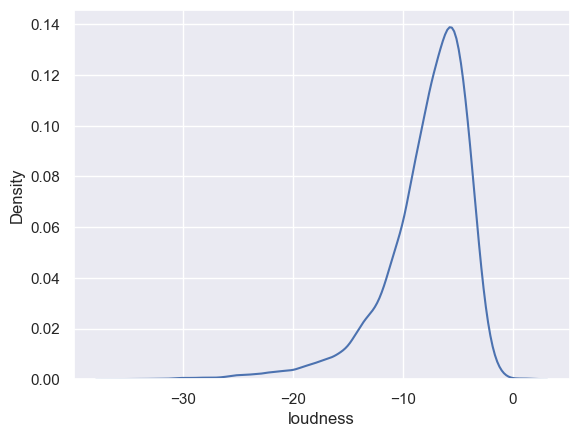

In [43]:
sns.kdeplot(df['loudness'])

<AxesSubplot:xlabel='mode', ylabel='Density'>

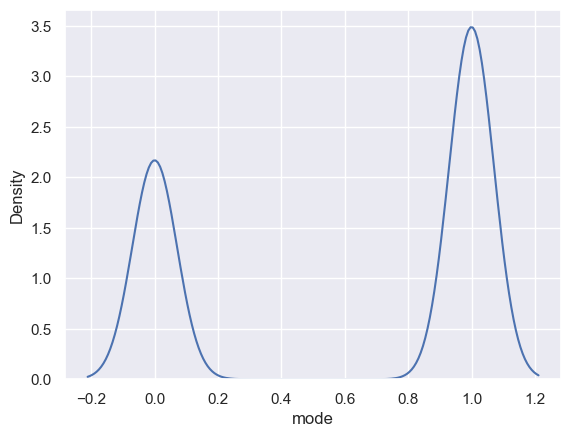

In [44]:
sns.kdeplot(df['mode'])

In [45]:
df['mode'].unique()

array([1, 0], dtype=int64)

<AxesSubplot:xlabel='speechiness', ylabel='Density'>

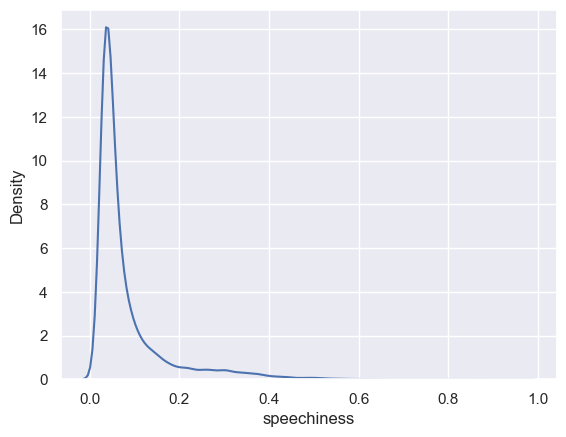

In [46]:
sns.kdeplot(df['speechiness'])

<AxesSubplot:xlabel='acousticness', ylabel='Density'>

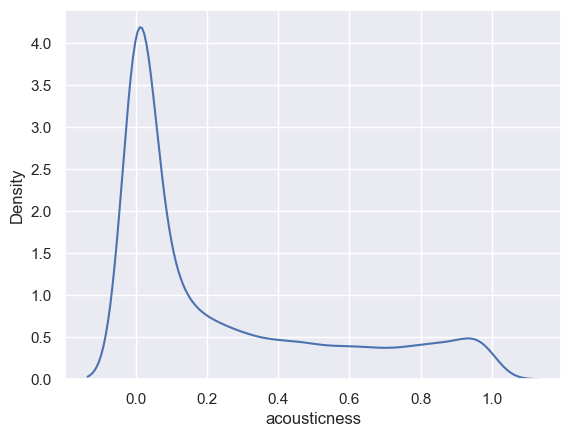

In [47]:
sns.kdeplot(df['acousticness'])

<AxesSubplot:xlabel='instrumentalness', ylabel='Density'>

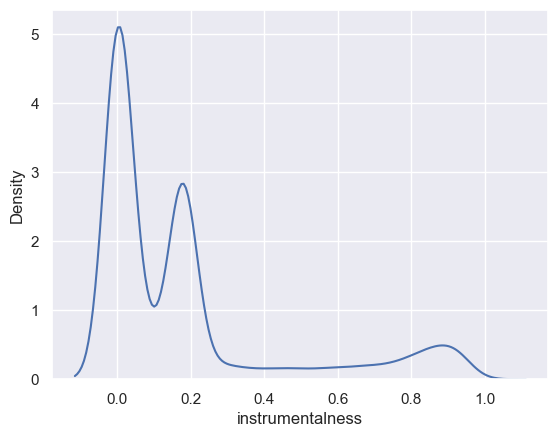

In [48]:
sns.kdeplot(df['instrumentalness'])

<AxesSubplot:xlabel='liveness', ylabel='Density'>

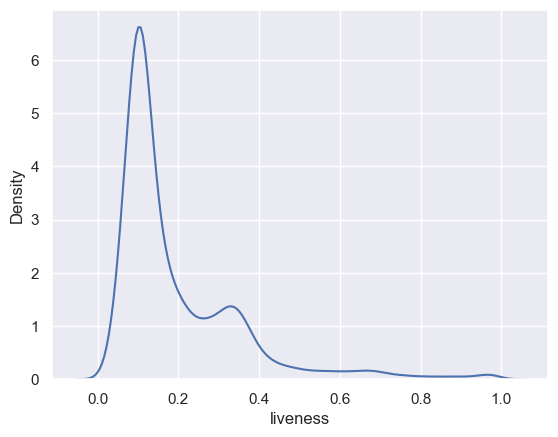

In [49]:
sns.kdeplot(df['liveness'])

<AxesSubplot:xlabel='valence', ylabel='Density'>

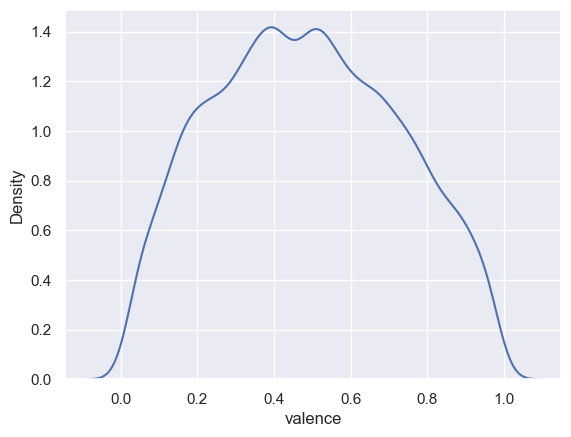

In [50]:
sns.kdeplot(df['valence'])

<AxesSubplot:xlabel='tempo', ylabel='Density'>

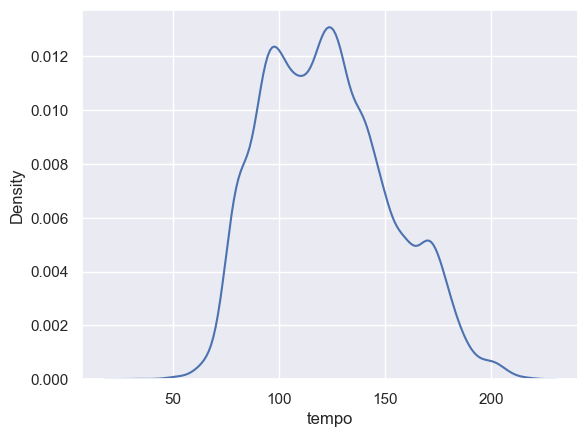

In [51]:
sns.kdeplot(df['tempo'])

<AxesSubplot:xlabel='duration_in min/ms', ylabel='Density'>

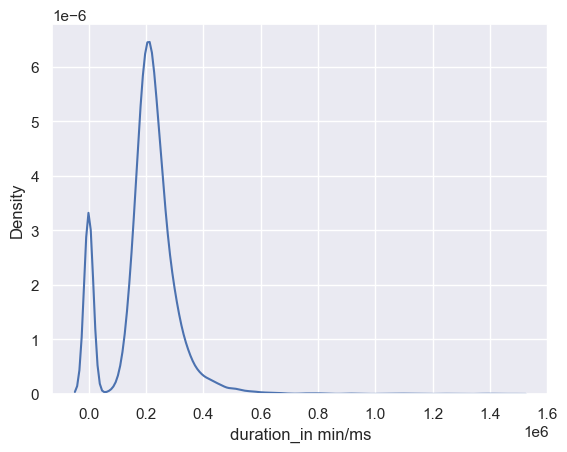

In [52]:
sns.kdeplot(df['duration_in min/ms'])

<AxesSubplot:xlabel='time_signature', ylabel='Density'>

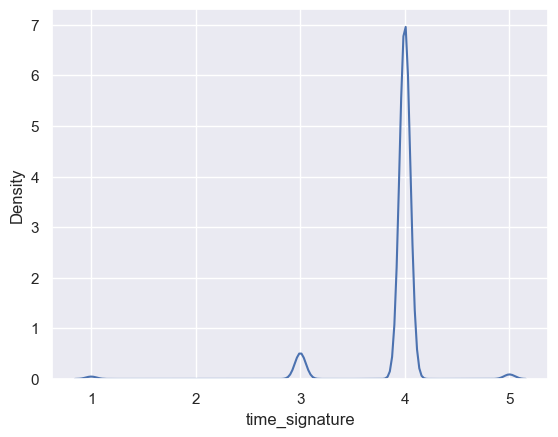

In [53]:
sns.kdeplot(df['time_signature'])

<AxesSubplot:xlabel='Class', ylabel='Density'>

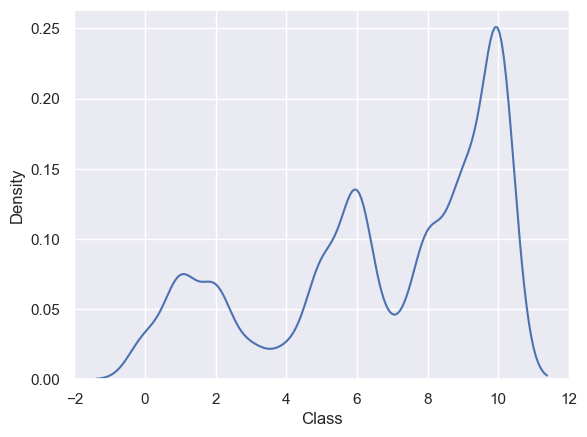

In [54]:
sns.kdeplot(df['Class'])

<AxesSubplot:xlabel='collaboration', ylabel='Density'>

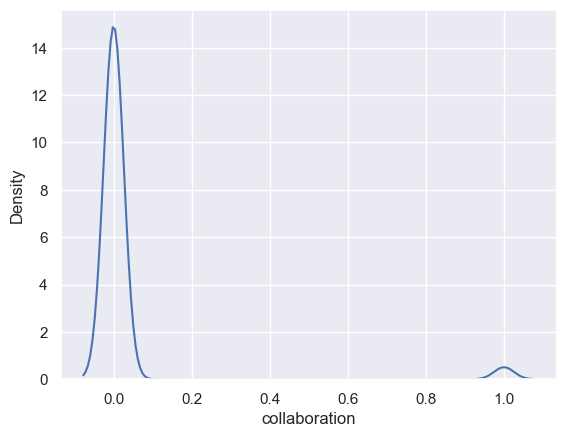

In [55]:
sns.kdeplot(df['collaboration'])

In [56]:
len(df.columns)


18

In [57]:
df.columns

Index(['Artist Name', 'Track Name', 'Popularity', 'danceability', 'energy',
       'key', 'loudness', 'mode', 'speechiness', 'acousticness',
       'instrumentalness', 'liveness', 'valence', 'tempo',
       'duration_in min/ms', 'time_signature', 'Class', 'collaboration'],
      dtype='object')

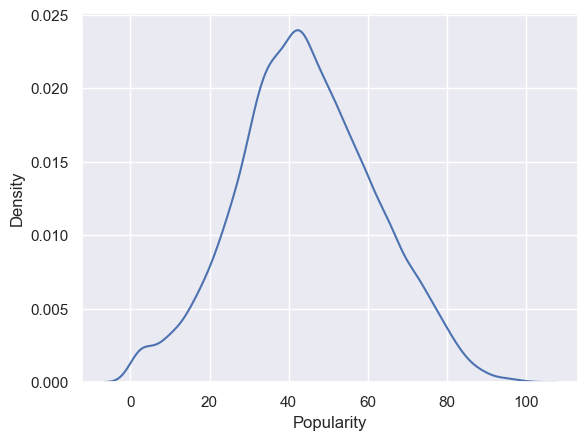

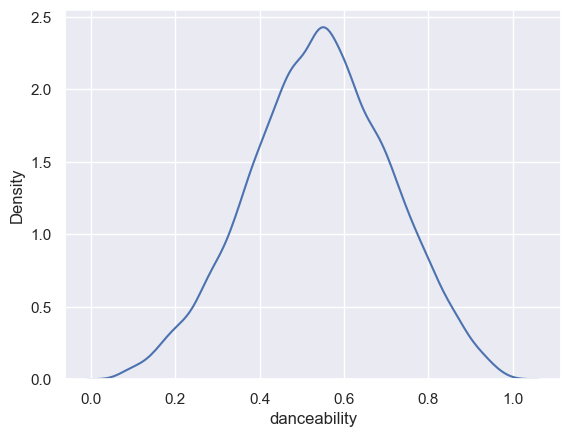

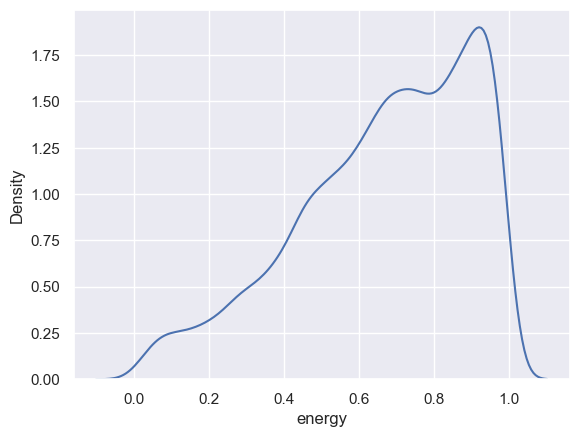

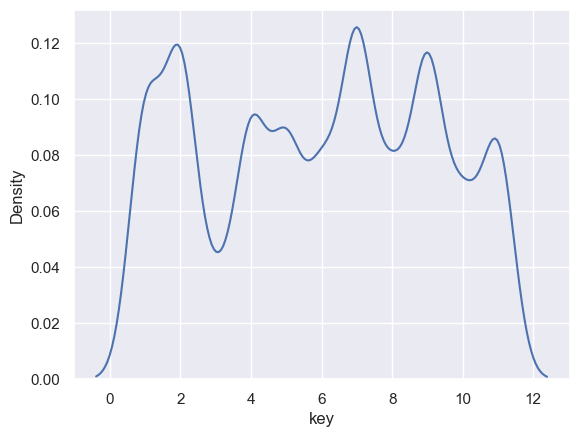

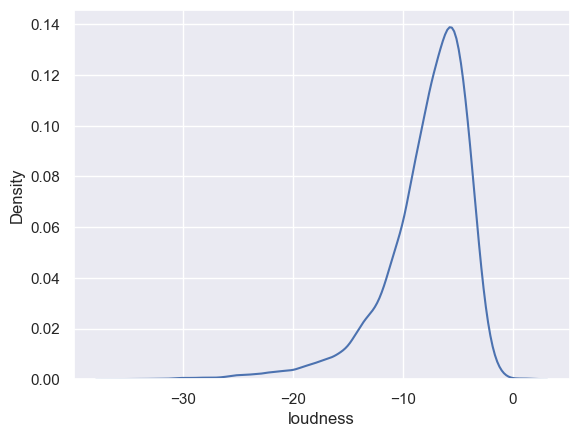

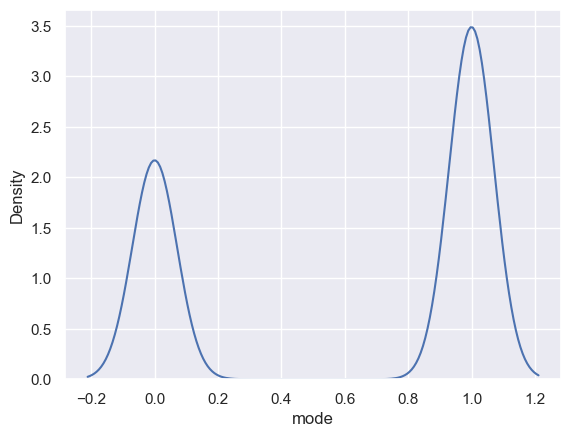

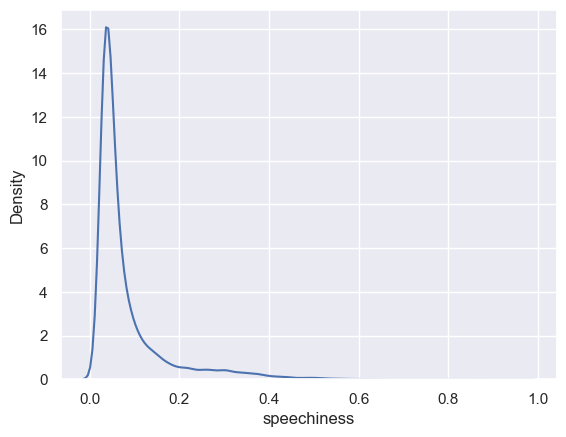

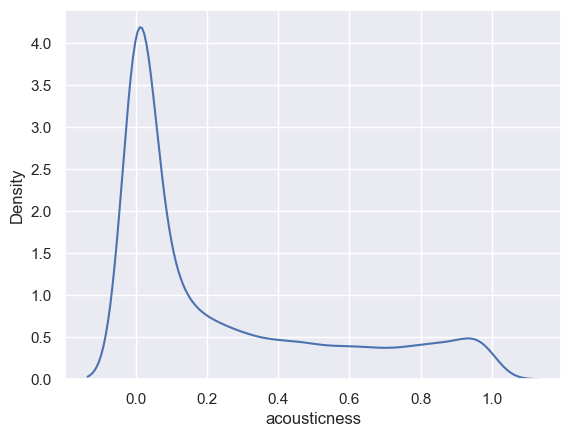

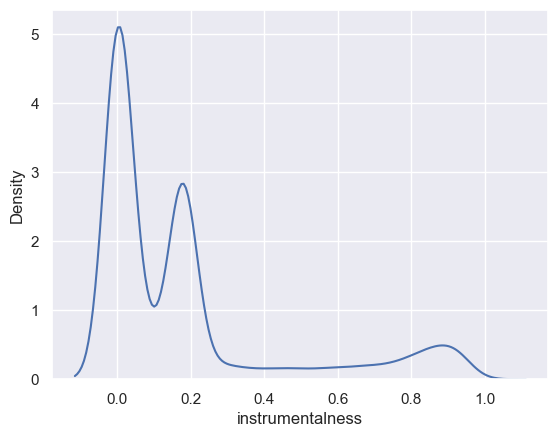

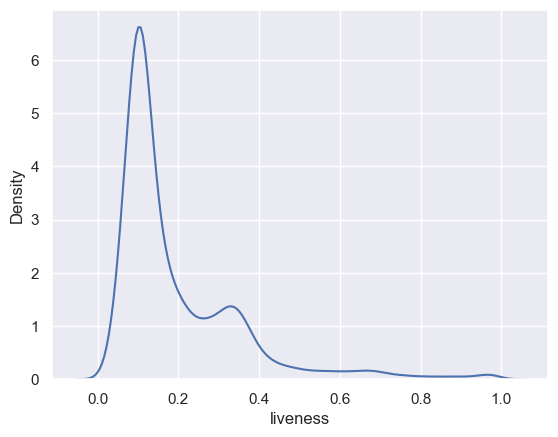

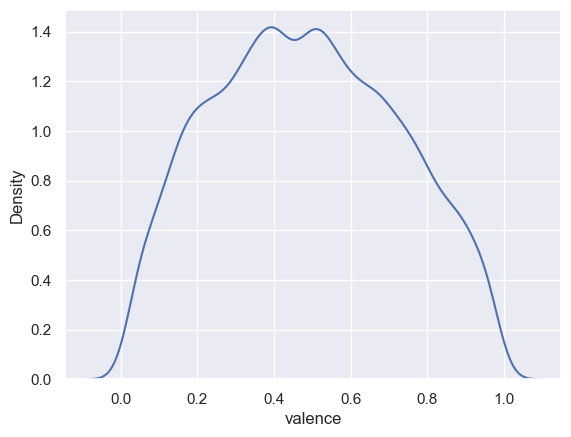

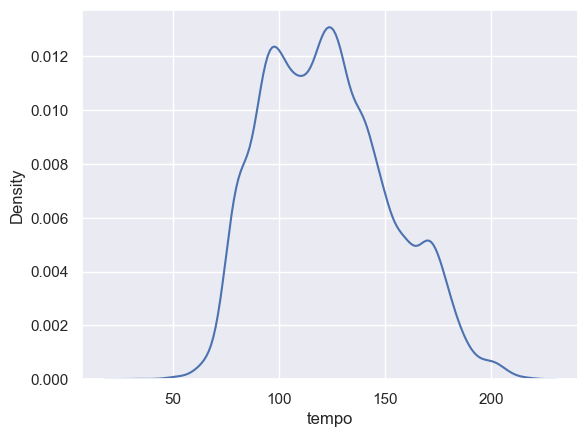

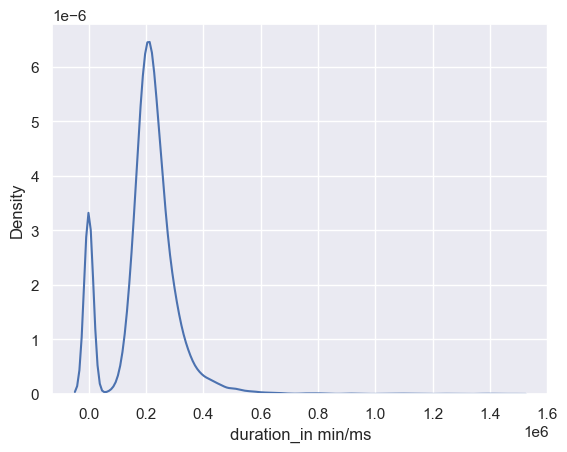

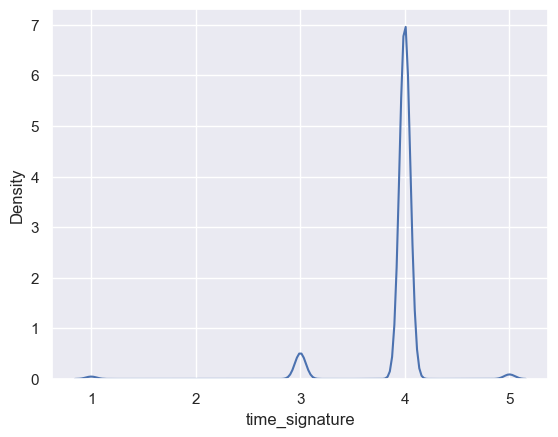

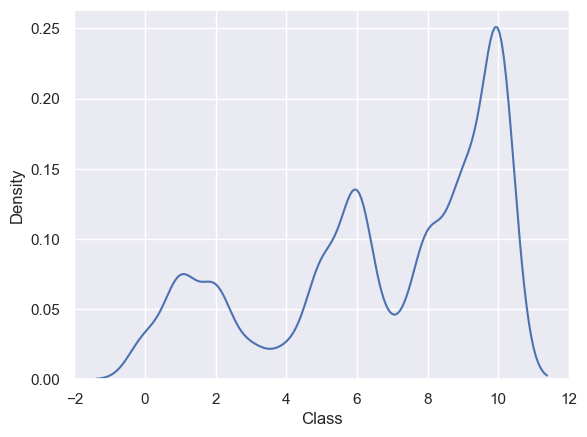

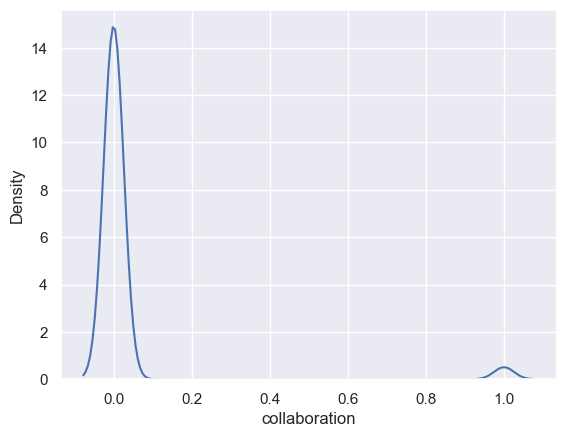

In [58]:
for i in range(2,18):
    sns.kdeplot(df.iloc[:,i])  
    plt.show()

In [59]:
count1 = df[df['mode']==1]
count1.shape
count1

,Artist Name,Track Name,Popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_in min/ms,time_signature,Class,collaboration
0,Bruno Mars,That's What I Like (feat. Gucci Mane),60.0,0.854,0.5640,1.0,-4.964,1,0.0485,0.017100,0.178991,0.0849,0.8990,134.071,234596.000000,4,5,0
1,Boston,Hitch a Ride,54.0,0.382,0.8140,3.0,-7.230,1,0.0406,0.001100,0.004010,0.1010,0.5690,116.454,251733.000000,4,10,0
2,The Raincoats,No Side to Fall In,35.0,0.434,0.6140,6.0,-8.334,1,0.0525,0.486000,0.000196,0.3940,0.7870,147.681,109667.000000,4,6,0
4,Red Hot Chili Peppers,Nobody Weird Like Me - Remastered,53.0,0.167,0.9750,2.0,-4.279,1,0.2160,0.000169,0.016100,0.1720,0.0918,199.060,229960.000000,4,10,0
5,The Stooges,Search and Destroy - Iggy Pop Mix,53.0,0.235,0.9770,6.0,0.878,1,0.1070,0.003530,0.006040,0.1720,0.2410,152.952,208133.000000,4,6,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17983,LAUREL,Let Go,46.0,0.579,0.7460,4.0,-4.912,1,0.0335,0.207000,0.000149,0.2420,0.4390,103.018,254240.000000,4,6,0
17984,dexter,Maybe the Problem Is Me,44.0,0.616,0.2190,7.0,-11.807,1,0.0870,0.987000,0.000839,0.1250,0.4700,147.924,133091.000000,4,6,0
17986,John Mayer,"Free Fallin' - Live at the Nokia Theatre, Los ...",71.0,0.315,0.2960,5.0,-13.262,1,0.0315,0.771000,0.178991,0.7020,0.4350,173.509,4.392883,4,0,0
17988,Sara Evans,Suds in the Bucket,65.0,0.511,0.9030,10.0,-3.163,1,0.0397,0.052000,0.000529,0.3040,0.8980,161.992,3.787783,4,4,0


In [60]:
cnt1 = count1.shape[0]
cnt1

9628

In [61]:
count2 = df[df['mode']==0]
cnt2=count2.shape[0]
cnt2

5985

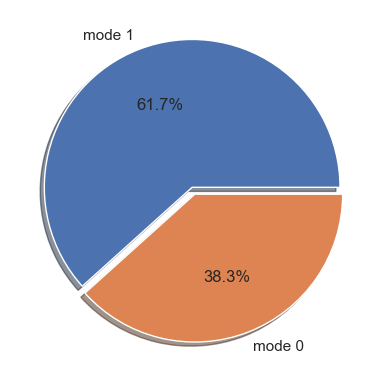

In [62]:
plt.pie([cnt1,cnt2],labels=['mode 1','mode 0'],autopct='%1.1f%%',shadow=True,explode=[0.05,0])
plt.show()

In [63]:
class0 = df[df['Class']==0].shape[0]


In [64]:
class1 = df[df['Class']==1].shape
class1[0]

1192

In [65]:
len(df['Class'].unique())

11

In [66]:
class0 = df[df['Class']==0].shape[0]
class1 = df[df['Class']==1].shape[0]
class2 = df[df['Class']==2].shape[0]
class3 = df[df['Class']==3].shape[0]
class4 = df[df['Class']==4].shape[0]
class5 = df[df['Class']==5].shape[0]
class6 = df[df['Class']==6].shape[0]
class7 = df[df['Class']==7].shape[0]
class8 = df[df['Class']==8].shape[0]
class9 = df[df['Class']==9].shape[0]
class10 = df[df['Class']==10].shape[0]


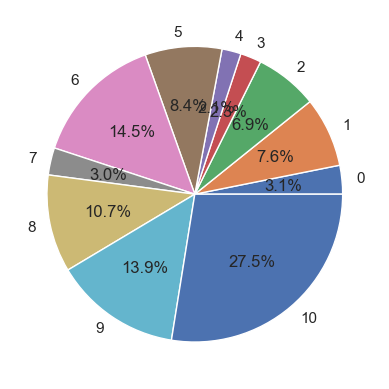

In [67]:
plt.pie([class0,class1,class2,class3,class4,class5,class6,class7,class8,class9,class10],
        labels=['0','1','2','3','4','5','6','7','8','9','10'],autopct='%1.1f%%')
plt.show()

In [68]:
count=[]

for i in range(len(df['Class'].unique())):
    count.append(df[df['Class']==i].shape[0])
count    

[491, 1192, 1075, 358, 326, 1311, 2263, 465, 1664, 2170, 4298]

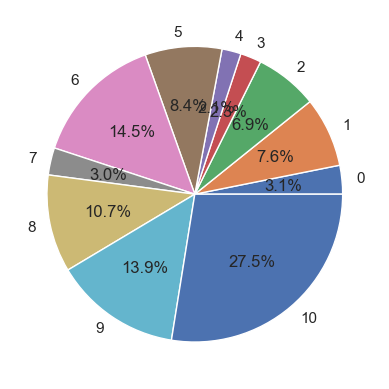

In [69]:
plt.pie(count,labels=['0','1','2','3','4','5','6','7','8','9','10'],autopct='%1.1f%%')
plt.show()

In [70]:
top5 = df.sort_values(by=['Popularity'],ascending=False)

In [71]:
top5.head(5)

,Artist Name,Track Name,Popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_in min/ms,time_signature,Class,collaboration
13489,Måneskin,Beggin',100.0,0.714,0.800,11.0,-4.808,0,0.0504,0.1270,0.178991,0.3590,0.589,134.002,3.526000,4,9,0
11781,Lil Nas X,MONTERO (Call Me By Your Name),100.0,0.610,0.508,8.0,-6.682,0,0.1520,0.2970,0.178991,0.3840,0.758,178.818,137876.000000,4,9,0
187,Olivia Rodrigo,good 4 u,99.0,0.563,0.664,9.0,-5.044,1,0.1540,0.3350,0.178991,0.0849,0.688,166.928,2.969117,4,9,0
953,Doja Cat,Kiss Me More (feat. SZA),98.0,0.762,0.701,8.0,-3.541,1,0.0286,0.2350,0.000158,0.1230,0.742,110.968,208867.000000,4,5,0
14830,"The Kid LAROI, Justin Bieber",STAY (with Justin Bieber),97.0,0.591,0.764,1.0,-5.484,1,0.0483,0.0383,0.178991,0.1030,0.478,169.928,2.363433,4,9,1


In [72]:
top5=top5[0:5]
top5

,Artist Name,Track Name,Popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_in min/ms,time_signature,Class,collaboration
13489,Måneskin,Beggin',100.0,0.714,0.800,11.0,-4.808,0,0.0504,0.1270,0.178991,0.3590,0.589,134.002,3.526000,4,9,0
11781,Lil Nas X,MONTERO (Call Me By Your Name),100.0,0.610,0.508,8.0,-6.682,0,0.1520,0.2970,0.178991,0.3840,0.758,178.818,137876.000000,4,9,0
187,Olivia Rodrigo,good 4 u,99.0,0.563,0.664,9.0,-5.044,1,0.1540,0.3350,0.178991,0.0849,0.688,166.928,2.969117,4,9,0
953,Doja Cat,Kiss Me More (feat. SZA),98.0,0.762,0.701,8.0,-3.541,1,0.0286,0.2350,0.000158,0.1230,0.742,110.968,208867.000000,4,5,0
14830,"The Kid LAROI, Justin Bieber",STAY (with Justin Bieber),97.0,0.591,0.764,1.0,-5.484,1,0.0483,0.0383,0.178991,0.1030,0.478,169.928,2.363433,4,9,1


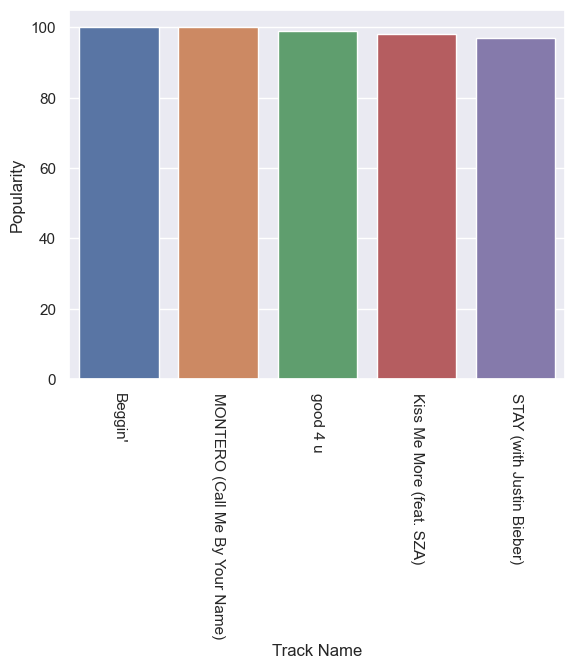

In [73]:
#plt.figure(figsize=(20,20))
plt.xticks(rotation=-90)
sns.barplot(top5['Track Name'],top5['Popularity'])
plt.show()


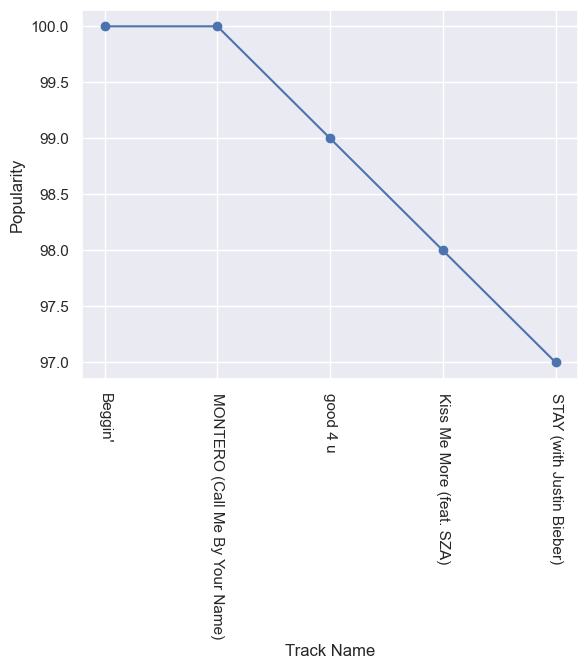

In [74]:
plt.plot(top5['Track Name'],top5['Popularity'])
plt.scatter(top5['Track Name'],top5['Popularity'])
plt.xlabel('Track Name')
plt.ylabel('Popularity')
plt.xticks(rotation=-90)
plt.show()

In [75]:
top5_duration = df.sort_values(by=['duration_in min/ms'],ascending=False)
top5_duration

,Artist Name,Track Name,Popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_in min/ms,time_signature,Class,collaboration
14837,Phish,Cities,17.0,0.432,0.6510,7.0,-7.443,1,0.0325,0.31900,0.164000,0.7010,0.5280,109.800,1.477187e+06,4,10,0
2174,Pink Floyd,Echoes,57.0,0.285,0.3220,6.0,-16.580,0,0.0440,0.36600,0.651000,0.1070,0.1420,134.042,1.412451e+06,4,10,0
10054,Genesis,Supper's Ready,43.0,0.310,0.6100,4.0,-9.415,0,0.0723,0.14700,0.000476,0.1790,0.1440,88.132,1.385907e+06,4,10,0
13222,Genesis,Supper's Ready - Digital Remastered 2008,43.0,0.310,0.6100,4.0,-9.415,0,0.0723,0.14700,0.000476,0.1790,0.1440,88.132,1.385907e+06,4,10,0
2028,Rajhesh Vaidhya,Nagumomu - Abheri - Adi,19.0,0.395,0.7740,2.0,-7.731,0,0.0433,0.34600,0.841000,0.0898,0.7620,91.578,1.284507e+06,4,6,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6220,Nicholas Britell,Little's Theme,43.0,0.266,0.0128,7.0,-24.109,1,0.0520,0.90900,0.922000,0.1310,0.0637,65.694,9.871167e-01,3,7,0
12398,Backstreet Boys,Intro,28.0,0.252,0.0974,8.0,-14.898,0,0.0321,0.93800,0.178991,0.1030,0.1210,156.495,9.793333e-01,3,9,0
9691,Bo Burnham,Bezos I,84.0,0.694,0.9480,2.0,-5.307,1,0.0361,0.00936,0.000016,0.1390,0.7050,115.044,9.691500e-01,4,9,0
1492,Prithviraj Kapoor,Agar Aisa Na Hua Toh Salim Tujhe Marne Nahin D...,1.0,0.597,0.3100,2.0,-12.812,1,0.0847,0.97900,0.178991,0.4380,0.9630,125.608,5.339167e-01,4,3,0


In [76]:
top5_duration=top5_duration[0:5]
top5_duration

,Artist Name,Track Name,Popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_in min/ms,time_signature,Class,collaboration
14837,Phish,Cities,17.0,0.432,0.651,7.0,-7.443,1,0.0325,0.319,0.164000,0.7010,0.528,109.800,1477187.0,4,10,0
2174,Pink Floyd,Echoes,57.0,0.285,0.322,6.0,-16.580,0,0.0440,0.366,0.651000,0.1070,0.142,134.042,1412451.0,4,10,0
10054,Genesis,Supper's Ready,43.0,0.310,0.610,4.0,-9.415,0,0.0723,0.147,0.000476,0.1790,0.144,88.132,1385907.0,4,10,0
13222,Genesis,Supper's Ready - Digital Remastered 2008,43.0,0.310,0.610,4.0,-9.415,0,0.0723,0.147,0.000476,0.1790,0.144,88.132,1385907.0,4,10,0
2028,Rajhesh Vaidhya,Nagumomu - Abheri - Adi,19.0,0.395,0.774,2.0,-7.731,0,0.0433,0.346,0.841000,0.0898,0.762,91.578,1284507.0,4,6,0


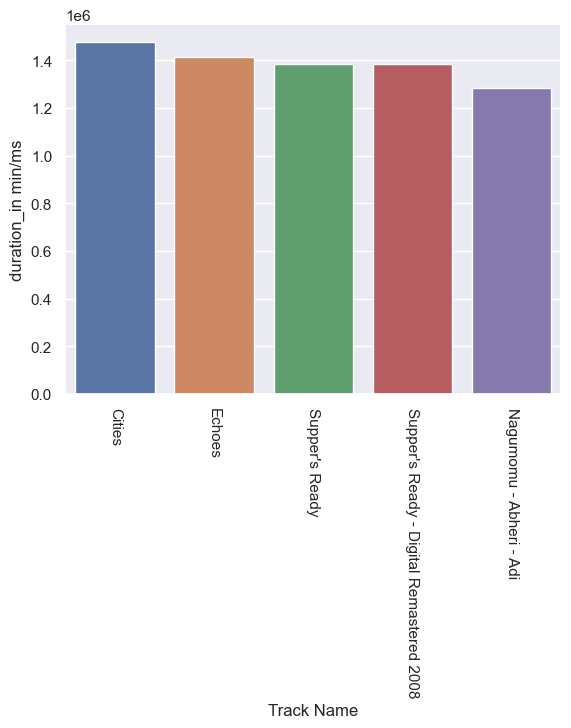

In [77]:
plt.xticks(rotation=-90)
sns.barplot(top5_duration['Track Name'],top5_duration['duration_in min/ms'])
plt.show()

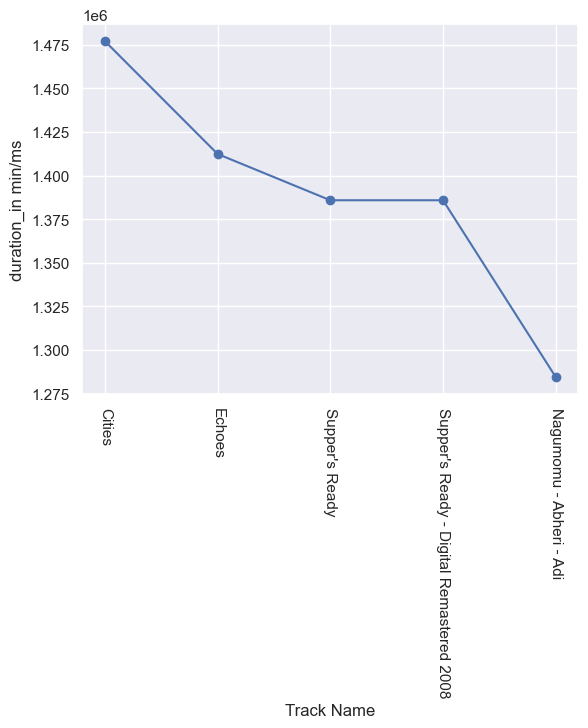

In [78]:
plt.plot(top5_duration['Track Name'],top5_duration['duration_in min/ms'])
plt.scatter(top5_duration['Track Name'],top5_duration['duration_in min/ms'])
plt.xlabel('Track Name')
plt.ylabel('duration_in min/ms')
plt.xticks(rotation=-90)
plt.show()

In [79]:
df.columns

Index(['Artist Name', 'Track Name', 'Popularity', 'danceability', 'energy',
       'key', 'loudness', 'mode', 'speechiness', 'acousticness',
       'instrumentalness', 'liveness', 'valence', 'tempo',
       'duration_in min/ms', 'time_signature', 'Class', 'collaboration'],
      dtype='object')

# Model Training and Building

In [80]:
df=df.reset_index(drop=True)
df

,Artist Name,Track Name,Popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_in min/ms,time_signature,Class,collaboration
0,Bruno Mars,That's What I Like (feat. Gucci Mane),60.0,0.854,0.564,1.0,-4.964,1,0.0485,0.017100,0.178991,0.0849,0.8990,134.071,234596.0,4,5,0
1,Boston,Hitch a Ride,54.0,0.382,0.814,3.0,-7.230,1,0.0406,0.001100,0.004010,0.1010,0.5690,116.454,251733.0,4,10,0
2,The Raincoats,No Side to Fall In,35.0,0.434,0.614,6.0,-8.334,1,0.0525,0.486000,0.000196,0.3940,0.7870,147.681,109667.0,4,6,0
3,Deno,Lingo (feat. J.I & Chunkz),66.0,0.853,0.597,10.0,-6.528,0,0.0555,0.021200,0.178991,0.1220,0.5690,107.033,173968.0,4,5,0
4,Red Hot Chili Peppers,Nobody Weird Like Me - Remastered,53.0,0.167,0.975,2.0,-4.279,1,0.2160,0.000169,0.016100,0.1720,0.0918,199.060,229960.0,4,10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15608,Green-House,Find Home,35.0,0.166,0.109,7.0,-17.100,0,0.0413,0.993000,0.824000,0.0984,0.1770,171.587,193450.0,3,6,0
15609,Micatone,All Gone,27.0,0.638,0.223,11.0,-10.174,0,0.0329,0.858000,0.000016,0.0705,0.3350,73.016,257067.0,4,2,0
15610,Smash Hit Combo,Peine perdue,34.0,0.558,0.981,4.0,-4.683,0,0.0712,0.000030,0.000136,0.6660,0.2620,105.000,216222.0,4,8,0
15611,Beherit,Salomon's Gate,29.0,0.215,0.805,6.0,-12.757,0,0.1340,0.001290,0.916000,0.2560,0.3550,131.363,219693.0,4,8,0


In [81]:
df.columns

Index(['Artist Name', 'Track Name', 'Popularity', 'danceability', 'energy',
       'key', 'loudness', 'mode', 'speechiness', 'acousticness',
       'instrumentalness', 'liveness', 'valence', 'tempo',
       'duration_in min/ms', 'time_signature', 'Class', 'collaboration'],
      dtype='object')

In [82]:
df2= df.drop(['Artist Name','Track Name','mode','time_signature','Class','collaboration'],axis='columns')
df2

,Popularity,danceability,energy,key,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_in min/ms
0,60.0,0.854,0.564,1.0,-4.964,0.0485,0.017100,0.178991,0.0849,0.8990,134.071,234596.0
1,54.0,0.382,0.814,3.0,-7.230,0.0406,0.001100,0.004010,0.1010,0.5690,116.454,251733.0
2,35.0,0.434,0.614,6.0,-8.334,0.0525,0.486000,0.000196,0.3940,0.7870,147.681,109667.0
3,66.0,0.853,0.597,10.0,-6.528,0.0555,0.021200,0.178991,0.1220,0.5690,107.033,173968.0
4,53.0,0.167,0.975,2.0,-4.279,0.2160,0.000169,0.016100,0.1720,0.0918,199.060,229960.0
...,...,...,...,...,...,...,...,...,...,...,...,...
15608,35.0,0.166,0.109,7.0,-17.100,0.0413,0.993000,0.824000,0.0984,0.1770,171.587,193450.0
15609,27.0,0.638,0.223,11.0,-10.174,0.0329,0.858000,0.000016,0.0705,0.3350,73.016,257067.0
15610,34.0,0.558,0.981,4.0,-4.683,0.0712,0.000030,0.000136,0.6660,0.2620,105.000,216222.0
15611,29.0,0.215,0.805,6.0,-12.757,0.1340,0.001290,0.916000,0.2560,0.3550,131.363,219693.0


In [83]:
def normalize(feature):
    return(  feature-np.mean(feature) / np.std(feature))



In [84]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()


In [85]:
df2=scaler.fit_transform(df2)
df2

array([[ 0.89219173,  1.86237823, -0.441135  , ...,  1.7256498 ,
         0.38710811,  0.28217801],
       [ 0.54633771, -0.97147431,  0.62995225, ...,  0.34911506,
        -0.20958453,  0.43689226],
       [-0.54886669, -0.65927021, -0.22691755, ...,  1.25846225,
         0.84808256, -0.84569128],
       ...,
       [-0.60650903,  0.08521647,  1.34543854, ..., -0.93147938,
        -0.59753467,  0.11629603],
       [-0.89472071, -1.97412976,  0.59139311, ..., -0.54354686,
         0.29538741,  0.1476325 ],
       [-0.087728  , -0.86340366,  0.79704187, ..., -0.45177788,
         0.52363919, -0.19061363]])

In [86]:
df2 = pd.DataFrame(df2,columns=['Popularity','danceability','energy','key','loudness','speechiness','acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo','duration_in min/ms'])
df2

,Popularity,danceability,energy,key,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_in min/ms
0,0.892192,1.862378,-0.441135,-1.551717,0.727199,-0.385493,-0.731701,-1.050342e-16,-0.701987,1.725650,0.387108,0.282178
1,0.546338,-0.971474,0.629952,-0.925698,0.158830,-0.478702,-0.783482,-6.621742e-01,-0.599960,0.349115,-0.209585,0.436892
2,-0.548867,-0.659270,-0.226918,0.013332,-0.118080,-0.338298,0.785790,-6.766073e-01,1.256803,1.258462,0.848083,-0.845691
3,1.238046,1.856374,-0.299751,1.265371,0.334909,-0.302902,-0.718433,-1.050342e-16,-0.466882,0.349115,-0.528676,-0.265177
4,0.488695,-2.262318,1.319732,-1.238708,0.899014,1.590773,-0.786495,-6.164225e-01,-0.150028,-1.641438,2.588303,0.240324
...,...,...,...,...,...,...,...,...,...,...,...,...
15608,-0.548867,-2.268322,-2.390514,0.326342,-2.316809,-0.470443,2.426584,2.440876e+00,-0.616437,-1.286041,1.657785,-0.089291
15609,-1.010005,0.565530,-1.902098,1.578381,-0.579597,-0.569551,1.989686,-6.772881e-01,-0.793241,-0.626973,-1.680842,0.485048
15610,-0.606509,0.085216,1.345439,-0.612688,0.797680,-0.117664,-0.786946,-6.768344e-01,2.980487,-0.931479,-0.597535,0.116296
15611,-0.894721,-1.974130,0.591393,0.013332,-1.227477,0.623288,-0.782867,2.789028e+00,0.382286,-0.543547,0.295387,0.147633


<AxesSubplot:xlabel='key', ylabel='Density'>

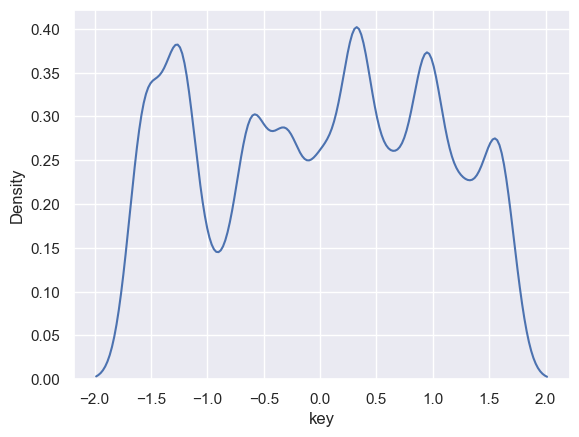

In [87]:
sns.kdeplot(df2['key'])

In [88]:
df

,Artist Name,Track Name,Popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_in min/ms,time_signature,Class,collaboration
0,Bruno Mars,That's What I Like (feat. Gucci Mane),60.0,0.854,0.564,1.0,-4.964,1,0.0485,0.017100,0.178991,0.0849,0.8990,134.071,234596.0,4,5,0
1,Boston,Hitch a Ride,54.0,0.382,0.814,3.0,-7.230,1,0.0406,0.001100,0.004010,0.1010,0.5690,116.454,251733.0,4,10,0
2,The Raincoats,No Side to Fall In,35.0,0.434,0.614,6.0,-8.334,1,0.0525,0.486000,0.000196,0.3940,0.7870,147.681,109667.0,4,6,0
3,Deno,Lingo (feat. J.I & Chunkz),66.0,0.853,0.597,10.0,-6.528,0,0.0555,0.021200,0.178991,0.1220,0.5690,107.033,173968.0,4,5,0
4,Red Hot Chili Peppers,Nobody Weird Like Me - Remastered,53.0,0.167,0.975,2.0,-4.279,1,0.2160,0.000169,0.016100,0.1720,0.0918,199.060,229960.0,4,10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15608,Green-House,Find Home,35.0,0.166,0.109,7.0,-17.100,0,0.0413,0.993000,0.824000,0.0984,0.1770,171.587,193450.0,3,6,0
15609,Micatone,All Gone,27.0,0.638,0.223,11.0,-10.174,0,0.0329,0.858000,0.000016,0.0705,0.3350,73.016,257067.0,4,2,0
15610,Smash Hit Combo,Peine perdue,34.0,0.558,0.981,4.0,-4.683,0,0.0712,0.000030,0.000136,0.6660,0.2620,105.000,216222.0,4,8,0
15611,Beherit,Salomon's Gate,29.0,0.215,0.805,6.0,-12.757,0,0.1340,0.001290,0.916000,0.2560,0.3550,131.363,219693.0,4,8,0


In [89]:
df=df.drop(['Popularity','danceability','energy','key','loudness','speechiness','acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo','duration_in min/ms'],axis='columns')

In [90]:
df

,Artist Name,Track Name,mode,time_signature,Class,collaboration
0,Bruno Mars,That's What I Like (feat. Gucci Mane),1,4,5,0
1,Boston,Hitch a Ride,1,4,10,0
2,The Raincoats,No Side to Fall In,1,4,6,0
3,Deno,Lingo (feat. J.I & Chunkz),0,4,5,0
4,Red Hot Chili Peppers,Nobody Weird Like Me - Remastered,1,4,10,0
...,...,...,...,...,...,...
15608,Green-House,Find Home,0,3,6,0
15609,Micatone,All Gone,0,4,2,0
15610,Smash Hit Combo,Peine perdue,0,4,8,0
15611,Beherit,Salomon's Gate,0,4,8,0


In [91]:
df2

,Popularity,danceability,energy,key,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_in min/ms
0,0.892192,1.862378,-0.441135,-1.551717,0.727199,-0.385493,-0.731701,-1.050342e-16,-0.701987,1.725650,0.387108,0.282178
1,0.546338,-0.971474,0.629952,-0.925698,0.158830,-0.478702,-0.783482,-6.621742e-01,-0.599960,0.349115,-0.209585,0.436892
2,-0.548867,-0.659270,-0.226918,0.013332,-0.118080,-0.338298,0.785790,-6.766073e-01,1.256803,1.258462,0.848083,-0.845691
3,1.238046,1.856374,-0.299751,1.265371,0.334909,-0.302902,-0.718433,-1.050342e-16,-0.466882,0.349115,-0.528676,-0.265177
4,0.488695,-2.262318,1.319732,-1.238708,0.899014,1.590773,-0.786495,-6.164225e-01,-0.150028,-1.641438,2.588303,0.240324
...,...,...,...,...,...,...,...,...,...,...,...,...
15608,-0.548867,-2.268322,-2.390514,0.326342,-2.316809,-0.470443,2.426584,2.440876e+00,-0.616437,-1.286041,1.657785,-0.089291
15609,-1.010005,0.565530,-1.902098,1.578381,-0.579597,-0.569551,1.989686,-6.772881e-01,-0.793241,-0.626973,-1.680842,0.485048
15610,-0.606509,0.085216,1.345439,-0.612688,0.797680,-0.117664,-0.786946,-6.768344e-01,2.980487,-0.931479,-0.597535,0.116296
15611,-0.894721,-1.974130,0.591393,0.013332,-1.227477,0.623288,-0.782867,2.789028e+00,0.382286,-0.543547,0.295387,0.147633


In [92]:
df=pd.concat([df,df2],axis='columns')
df

,Artist Name,Track Name,mode,time_signature,Class,collaboration,Popularity,danceability,energy,key,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_in min/ms
0,Bruno Mars,That's What I Like (feat. Gucci Mane),1,4,5,0,0.892192,1.862378,-0.441135,-1.551717,0.727199,-0.385493,-0.731701,-1.050342e-16,-0.701987,1.725650,0.387108,0.282178
1,Boston,Hitch a Ride,1,4,10,0,0.546338,-0.971474,0.629952,-0.925698,0.158830,-0.478702,-0.783482,-6.621742e-01,-0.599960,0.349115,-0.209585,0.436892
2,The Raincoats,No Side to Fall In,1,4,6,0,-0.548867,-0.659270,-0.226918,0.013332,-0.118080,-0.338298,0.785790,-6.766073e-01,1.256803,1.258462,0.848083,-0.845691
3,Deno,Lingo (feat. J.I & Chunkz),0,4,5,0,1.238046,1.856374,-0.299751,1.265371,0.334909,-0.302902,-0.718433,-1.050342e-16,-0.466882,0.349115,-0.528676,-0.265177
4,Red Hot Chili Peppers,Nobody Weird Like Me - Remastered,1,4,10,0,0.488695,-2.262318,1.319732,-1.238708,0.899014,1.590773,-0.786495,-6.164225e-01,-0.150028,-1.641438,2.588303,0.240324
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15608,Green-House,Find Home,0,3,6,0,-0.548867,-2.268322,-2.390514,0.326342,-2.316809,-0.470443,2.426584,2.440876e+00,-0.616437,-1.286041,1.657785,-0.089291
15609,Micatone,All Gone,0,4,2,0,-1.010005,0.565530,-1.902098,1.578381,-0.579597,-0.569551,1.989686,-6.772881e-01,-0.793241,-0.626973,-1.680842,0.485048
15610,Smash Hit Combo,Peine perdue,0,4,8,0,-0.606509,0.085216,1.345439,-0.612688,0.797680,-0.117664,-0.786946,-6.768344e-01,2.980487,-0.931479,-0.597535,0.116296
15611,Beherit,Salomon's Gate,0,4,8,0,-0.894721,-1.974130,0.591393,0.013332,-1.227477,0.623288,-0.782867,2.789028e+00,0.382286,-0.543547,0.295387,0.147633


In [93]:
len(df['Artist Name'].unique())

8264

In [94]:
df=df.drop(['Artist Name','Track Name'],axis='columns')
df

,mode,time_signature,Class,collaboration,Popularity,danceability,energy,key,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_in min/ms
0,1,4,5,0,0.892192,1.862378,-0.441135,-1.551717,0.727199,-0.385493,-0.731701,-1.050342e-16,-0.701987,1.725650,0.387108,0.282178
1,1,4,10,0,0.546338,-0.971474,0.629952,-0.925698,0.158830,-0.478702,-0.783482,-6.621742e-01,-0.599960,0.349115,-0.209585,0.436892
2,1,4,6,0,-0.548867,-0.659270,-0.226918,0.013332,-0.118080,-0.338298,0.785790,-6.766073e-01,1.256803,1.258462,0.848083,-0.845691
3,0,4,5,0,1.238046,1.856374,-0.299751,1.265371,0.334909,-0.302902,-0.718433,-1.050342e-16,-0.466882,0.349115,-0.528676,-0.265177
4,1,4,10,0,0.488695,-2.262318,1.319732,-1.238708,0.899014,1.590773,-0.786495,-6.164225e-01,-0.150028,-1.641438,2.588303,0.240324
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15608,0,3,6,0,-0.548867,-2.268322,-2.390514,0.326342,-2.316809,-0.470443,2.426584,2.440876e+00,-0.616437,-1.286041,1.657785,-0.089291
15609,0,4,2,0,-1.010005,0.565530,-1.902098,1.578381,-0.579597,-0.569551,1.989686,-6.772881e-01,-0.793241,-0.626973,-1.680842,0.485048
15610,0,4,8,0,-0.606509,0.085216,1.345439,-0.612688,0.797680,-0.117664,-0.786946,-6.768344e-01,2.980487,-0.931479,-0.597535,0.116296
15611,0,4,8,0,-0.894721,-1.974130,0.591393,0.013332,-1.227477,0.623288,-0.782867,2.789028e+00,0.382286,-0.543547,0.295387,0.147633


In [95]:
df.isnull().sum()

mode                  0
time_signature        0
Class                 0
collaboration         0
Popularity            0
danceability          0
energy                0
key                   0
loudness              0
speechiness           0
acousticness          0
instrumentalness      0
liveness              0
valence               0
tempo                 0
duration_in min/ms    0
dtype: int64

In [96]:
y=df['Class']

In [97]:
x=df.drop(['Class'],axis='columns')

In [98]:
x

,mode,time_signature,collaboration,Popularity,danceability,energy,key,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_in min/ms
0,1,4,0,0.892192,1.862378,-0.441135,-1.551717,0.727199,-0.385493,-0.731701,-1.050342e-16,-0.701987,1.725650,0.387108,0.282178
1,1,4,0,0.546338,-0.971474,0.629952,-0.925698,0.158830,-0.478702,-0.783482,-6.621742e-01,-0.599960,0.349115,-0.209585,0.436892
2,1,4,0,-0.548867,-0.659270,-0.226918,0.013332,-0.118080,-0.338298,0.785790,-6.766073e-01,1.256803,1.258462,0.848083,-0.845691
3,0,4,0,1.238046,1.856374,-0.299751,1.265371,0.334909,-0.302902,-0.718433,-1.050342e-16,-0.466882,0.349115,-0.528676,-0.265177
4,1,4,0,0.488695,-2.262318,1.319732,-1.238708,0.899014,1.590773,-0.786495,-6.164225e-01,-0.150028,-1.641438,2.588303,0.240324
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15608,0,3,0,-0.548867,-2.268322,-2.390514,0.326342,-2.316809,-0.470443,2.426584,2.440876e+00,-0.616437,-1.286041,1.657785,-0.089291
15609,0,4,0,-1.010005,0.565530,-1.902098,1.578381,-0.579597,-0.569551,1.989686,-6.772881e-01,-0.793241,-0.626973,-1.680842,0.485048
15610,0,4,0,-0.606509,0.085216,1.345439,-0.612688,0.797680,-0.117664,-0.786946,-6.768344e-01,2.980487,-0.931479,-0.597535,0.116296
15611,0,4,0,-0.894721,-1.974130,0.591393,0.013332,-1.227477,0.623288,-0.782867,2.789028e+00,0.382286,-0.543547,0.295387,0.147633


In [99]:
y

0         5
1        10
2         6
3         5
4        10
         ..
15608     6
15609     2
15610     8
15611     8
15612    10
Name: Class, Length: 15613, dtype: int64

In [100]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.8,random_state=77)

LOGISTIC REGRESSION

In [101]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(multi_class='multinomial')
lr.fit(x_train,y_train)

LogisticRegression(multi_class='multinomial')

In [102]:
lr.score(x_test,y_test)

0.48382965097662506

STANDARD VECTOR MACHINES(STANDARD VECTOR CLASSIFIER)

In [103]:
from sklearn.svm import SVC

In [104]:
svc=SVC()
svc.fit(x_train,y_train)

SVC()

In [105]:
svc.score(x_test,y_test)

0.5084854306756325

RANDOM FOREST CLASSIFIER

In [106]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(x_train,y_train)


RandomForestClassifier()

In [107]:
rfc.score(x_test,y_test)

0.4966378482228626

KNN

In [108]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()
knn.fit(x_train,y_train)
knn.score(x_test,y_test)

0.425552353506244

XGBOOT CLASSIFIER

In [109]:
from xgboost import XGBClassifier

In [110]:
xgb=XGBClassifier()
xgb.fit(x_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_bin=256, max_cat_threshold=64, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, objective='multi:softprob',
              predictor='auto', ...)

In [117]:
xgb.score(x_test,y_test)

0.5184117835414666

NAIVE BAYES

In [124]:
from sklearn.naive_bayes import GaussianNB
gnb=GaussianNB()
gnb.fit(x_train,y_train)
gnb.score(x_test,y_test)

0.2520012808197246

In [126]:
from sklearn.model_selection import cross_val_score
np.average(cross_val_score(lr,x,y,cv=10))

0.495035069774538

In [129]:
scores=cross_val_score(svc,x,y,cv=10)
np.average(scores)

0.5231524491424699

In [130]:
scores1=cross_val_score(rfc,x,y,cv=10)
np.average(scores1)

0.5001592924854468

In [131]:
scores2=cross_val_score(xgb,x,y,cv=10)
np.average(scores2)

0.5168766369107429

In [132]:
scores3=cross_val_score(gnb,x,y,cv=10)
np.average(scores3)

0.25286410677682075

Evaluation matrix

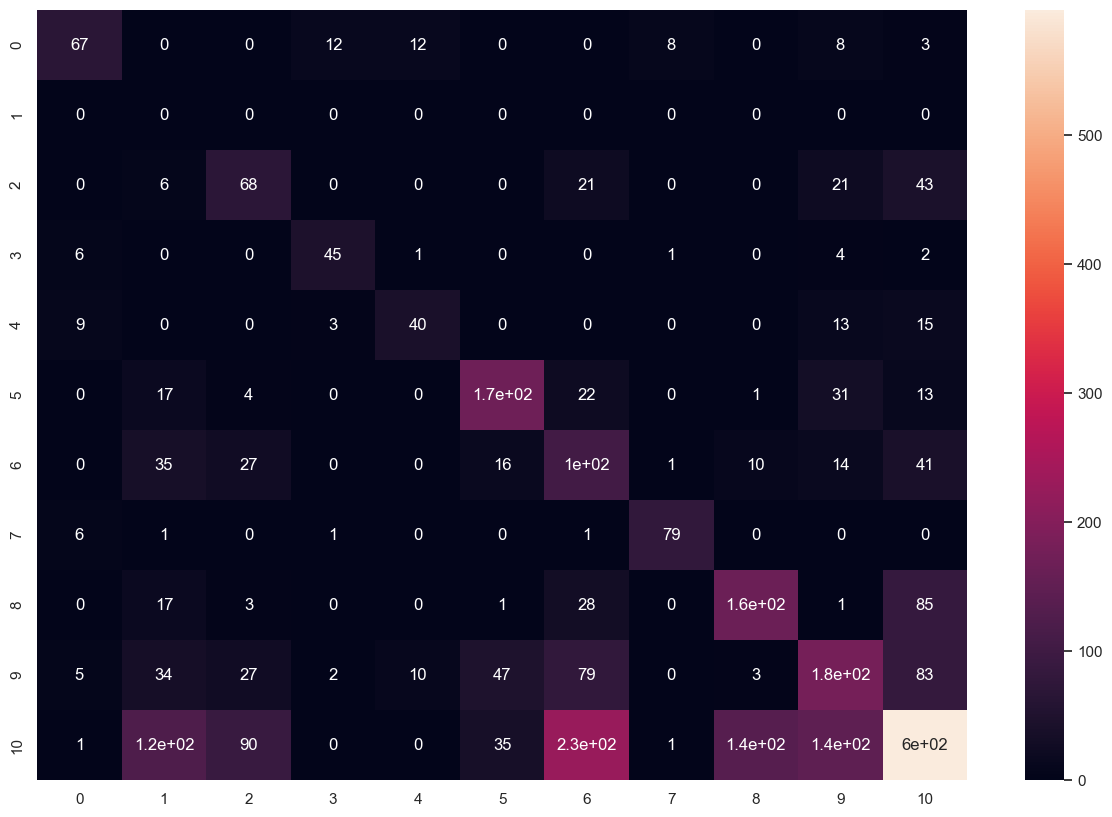

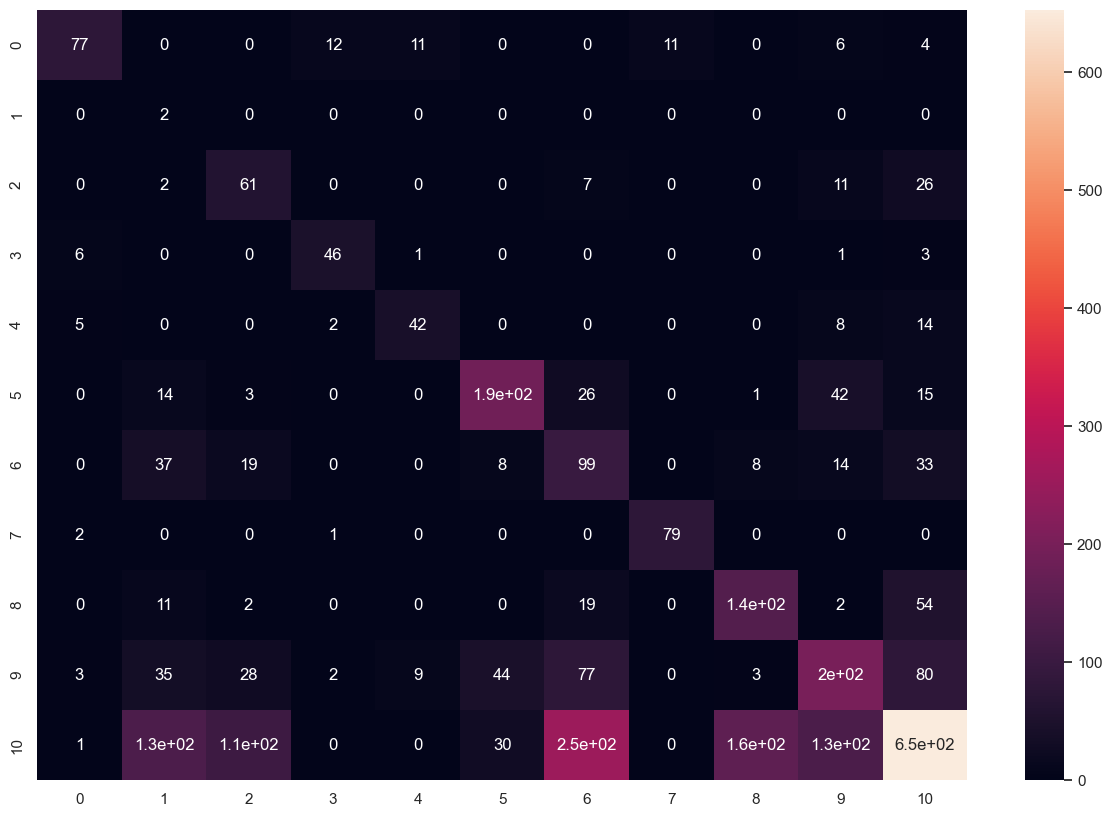

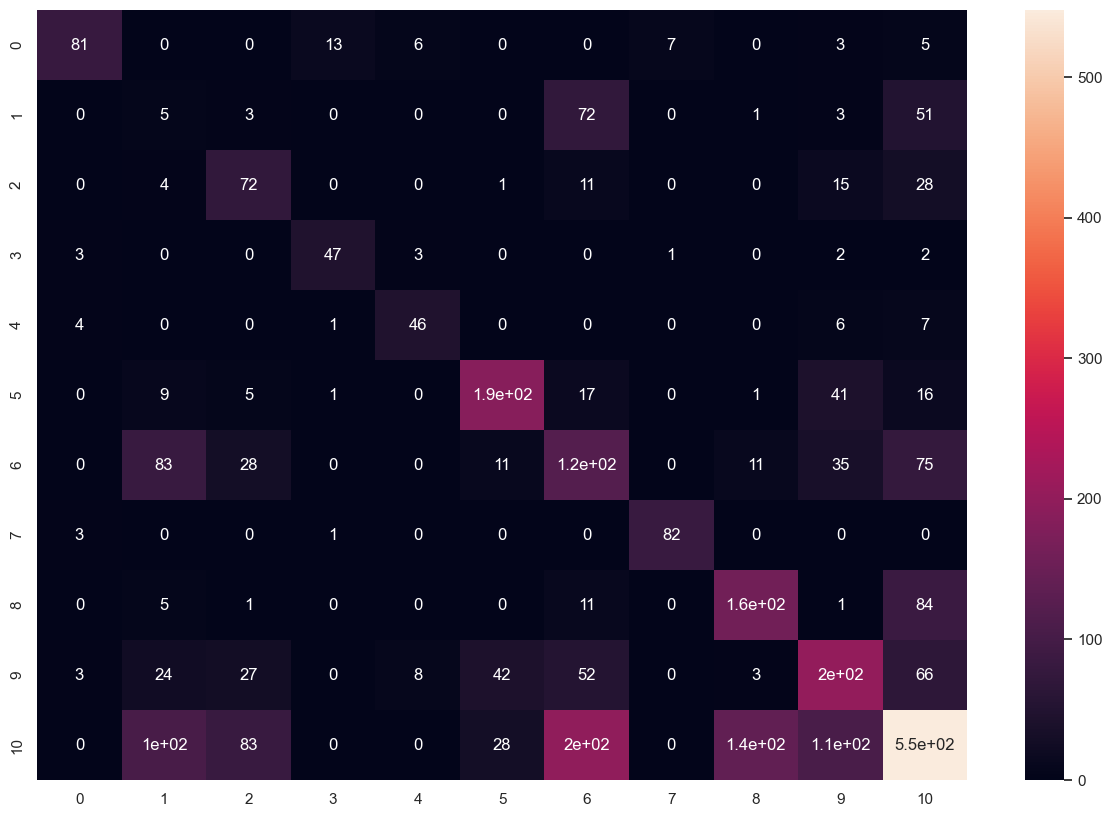

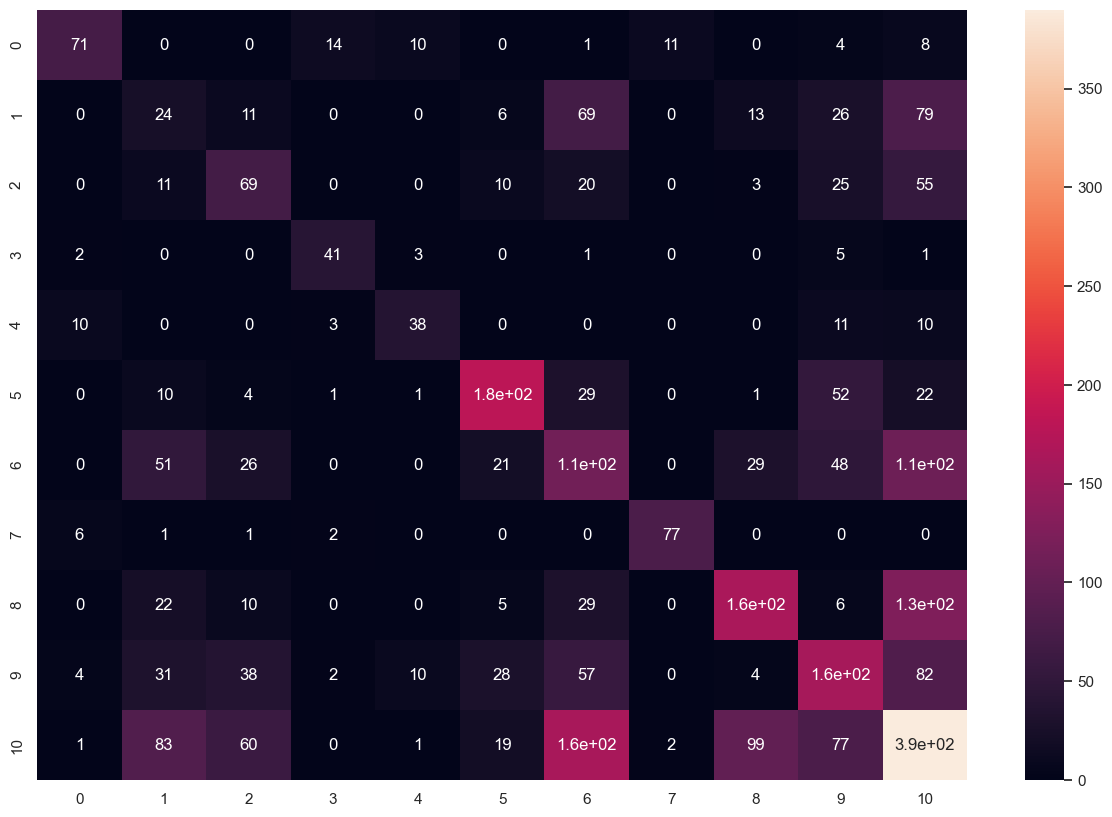

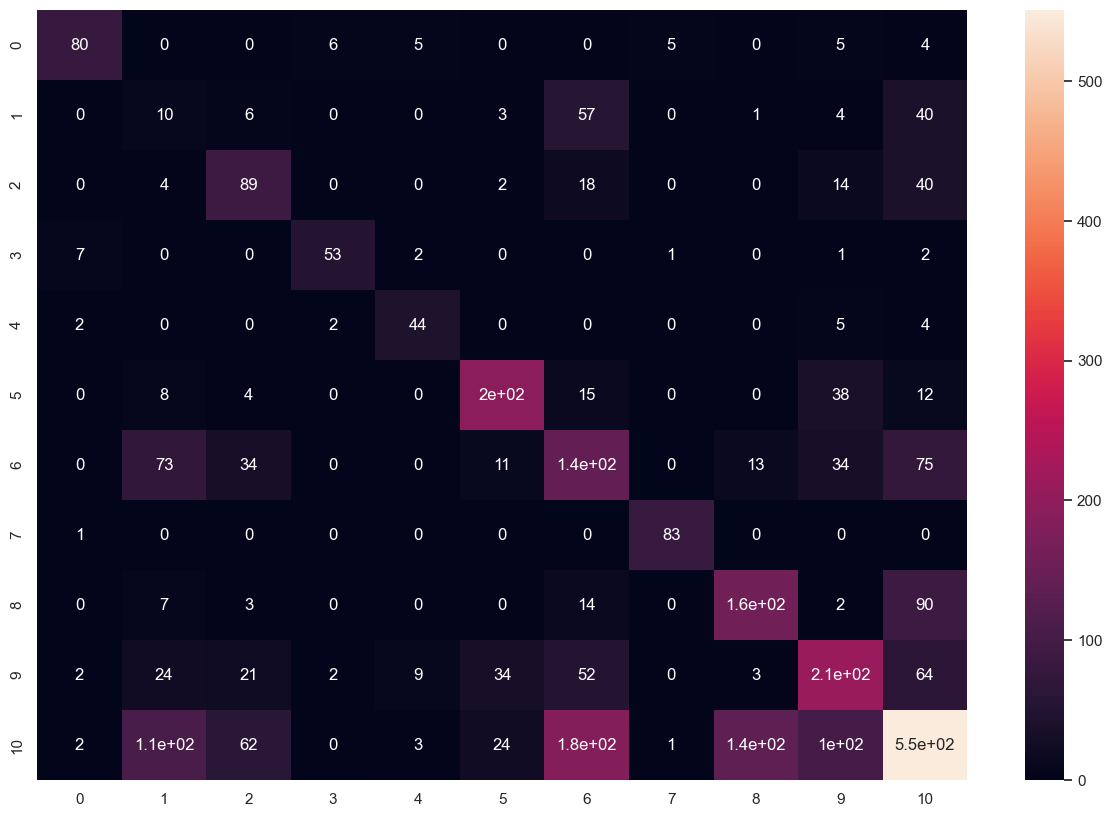

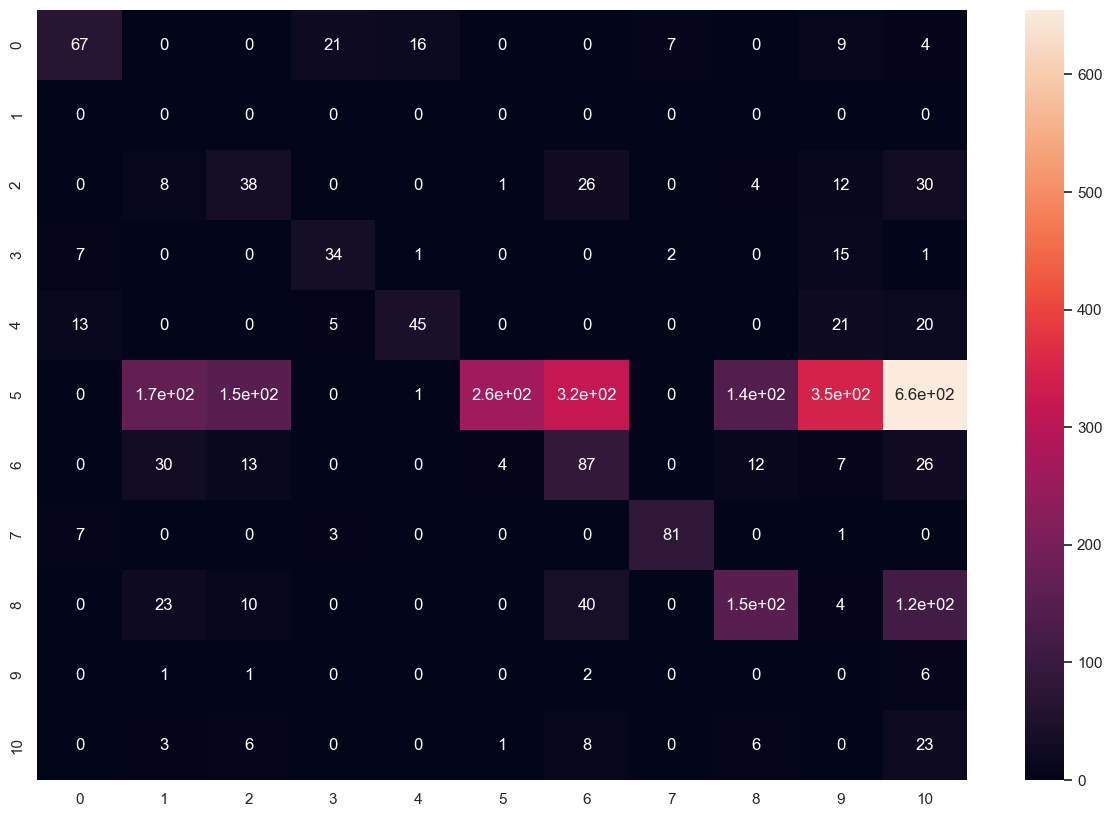

In [139]:
from sklearn import metrics
for i in models:
    y_pred=i.predict(x_test)
    matrix =metrics.confusion_matrix(y_pred,y_test)
    plt.figure(figsize=(15,10))
    sns.heatmap(matrix,annot=True)
    plt.show()